In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d rohanrao/nifty50-stock-market-data

nifty50-stock-market-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip nifty50-stock-market-data

Archive:  nifty50-stock-market-data.zip
replace ADANIPORTS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ADANIPORTS.csv          
  inflating: ASIANPAINT.csv          
  inflating: AXISBANK.csv            
  inflating: BAJAJ-AUTO.csv          
  inflating: BAJAJFINSV.csv          
  inflating: BAJFINANCE.csv          
  inflating: BHARTIARTL.csv          
  inflating: BPCL.csv                
  inflating: BRITANNIA.csv           
  inflating: CIPLA.csv               
  inflating: COALINDIA.csv           
  inflating: DRREDDY.csv             
  inflating: EICHERMOT.csv           
  inflating: GAIL.csv                
  inflating: GRASIM.csv              
  inflating: HCLTECH.csv             
  inflating: HDFC.csv                
  inflating: HDFCBANK.csv            
  inflating: HEROMOTOCO.csv          
  inflating: HINDALCO.csv            
  inflating: HINDUNILVR.csv          
  inflating: ICICIBANK.csv           
  inflating: INDUSINDBK.csv          
  inflating: INFRATEL.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Loading the dataset

1.parse_dates --> argument in the read_csv() - gives us the option to convert the column containing date to convert into date \
2.index_col --> argument in the read_csv() - gives us the option to convert the date column into index column

In [ ]:
stocks=pd.read_csv('NIFTY50_all.csv',parse_dates=['Date'], index_col= ['Date'])
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235192 entries, 2007-11-27 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Symbol              235192 non-null  object 
 1   Series              235192 non-null  object 
 2   Prev Close          235192 non-null  float64
 3   Open                235192 non-null  float64
 4   High                235192 non-null  float64
 5   Low                 235192 non-null  float64
 6   Last                235192 non-null  float64
 7   Close               235192 non-null  float64
 8   VWAP                235192 non-null  float64
 9   Volume              235192 non-null  int64  
 10  Turnover            235192 non-null  float64
 11  Trades              120344 non-null  float64
 12  Deliverable Volume  219115 non-null  float64
 13  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 26.9+ MB


There are null values in trades.

In [ ]:
stocks.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

Thus we can see conversion into datetime. 

In [ ]:
stocks.head()

Symbol Series  Prev Close    Open     High    Low   Last  \
Date                                                                       
2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

             Close    VWAP    Volume      Turnover  Trades  \
Date                                                         
2007-11-27  962.90  984.72  27294366  2.687719e+15     NaN   
2007-11-28  893.90  941.38   4581338  4.312765e+14     NaN   
2007-11-29  884.20  888.09   5124121  4.550658e+14     NaN   
2007-11-30  921.55  929.17   4609762  4.283257e+14     NaN   
2007-12-03  969.30  965.65   2977470  2.875200e+14     NaN   

            Deliverable Volume  %Deliverble  
Date                                         
2007-11-27           9859619.0       0.3612  
2007-11-28           1453278.0       0.3172  
2007-11-29           1069678.0       0.2088  
2007-11-30           1260913.0       0.2735  
2007-12-03            816123.0       0.2741

In [ ]:
stocks['Symbol'].unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [ ]:
len(stocks['Symbol'].unique())

65

Minimizing this to 50 stocks,as some stocks 2 and more than two names/symbols.

Stationary time series - Mean does not change with time for a period.(data fluctuates around mean) \
Non stationary time series - Mean changes with time continuosly, \
We can predict on non stationary time series using traditional methods of ML.So we convert our data to stationary time series.

In [ ]:
stocks.loc[stocks['Symbol'] == 'MUNDRAPORT','Symbol'] = 'ADANIPORTS'
stocks.loc[stocks['Symbol'] == 'BAJAUTOFIN','Symbol'] = 'BAJFINANCE'
stocks.loc[stocks['Symbol'] == 'HINDALC0','Symbol'] = 'HINDALCO'
stocks.loc[stocks['Symbol'] == 'KOTAKMAH','Symbol'] = 'KOTAKBANK'
stocks.loc[stocks['Symbol'] == 'UTIBANK','Symbol'] = 'AXISBANK'
stocks.loc[stocks['Symbol'] == 'ZEETELE','Symbol'] = 'ZEEL'
stocks.loc[stocks['Symbol'] == 'INFOSYSTCH','Symbol'] = 'INFY'
stocks.loc[stocks['Symbol'] == 'BHARTI','Symbol'] = 'BHARTIARTL'
stocks.loc[stocks['Symbol'] == 'SESAGOA','Symbol'] = 'VEDL'
stocks.loc[stocks['Symbol'] == 'HEROHONDA','Symbol'] = 'HEROMOTOCO'
stocks.loc[stocks['Symbol'] == 'TELCO','Symbol'] = 'TATAMOTORS'
stocks.loc[stocks['Symbol'] == 'TISCO','Symbol'] = 'TATASTEEL'
stocks.loc[stocks['Symbol'] == 'HINDLEVER','Symbol'] = 'HINDUNILVR'
stocks.loc[stocks['Symbol'] == 'JSWSTL','Symbol'] = 'JSWSTEEL'
stocks.loc[stocks['Symbol'] == 'SSLT','Symbol'] = 'VEDL'

In [ ]:
stocks.head()

Symbol Series  Prev Close    Open     High    Low   Last  \
Date                                                                       
2007-11-27  ADANIPORTS     EQ      440.00  770.00  1050.00  770.0  959.0   
2007-11-28  ADANIPORTS     EQ      962.90  984.00   990.00  874.0  885.0   
2007-11-29  ADANIPORTS     EQ      893.90  909.00   914.75  841.0  887.0   
2007-11-30  ADANIPORTS     EQ      884.20  890.00   958.00  890.0  929.0   
2007-12-03  ADANIPORTS     EQ      921.55  939.75   995.00  922.0  980.0   

             Close    VWAP    Volume      Turnover  Trades  \
Date                                                         
2007-11-27  962.90  984.72  27294366  2.687719e+15     NaN   
2007-11-28  893.90  941.38   4581338  4.312765e+14     NaN   
2007-11-29  884.20  888.09   5124121  4.550658e+14     NaN   
2007-11-30  921.55  929.17   4609762  4.283257e+14     NaN   
2007-12-03  969.30  965.65   2977470  2.875200e+14     NaN   

            Deliverable Volume  %Deliverble  
Date                                         
2007-11-27           9859619.0       0.3612  
2007-11-28           1453278.0       0.3172  
2007-11-29           1069678.0       0.2088  
2007-11-30           1260913.0       0.2735  
2007-12-03            816123.0       0.2741

In [ ]:
len(stocks['Symbol'].unique())

50

Thus now we have 50 unique stocks.

Our main focus is on closing price.So we are only going to predict closing price(target variable).Now lets create a dataframe with only closing price related to that respective stocks.

In [ ]:
stocks_df=pd.DataFrame()
for i in stocks['Symbol'].unique():
    stocks_df.loc[:,i] = stocks[stocks['Symbol'] == i]['Close']

In [ ]:
stocks_df.head()

ADANIPORTS  ASIANPAINT  AXISBANK  BAJAJ-AUTO  BAJAJFINSV  \
Date                                                                   
2007-11-27      962.90      998.15    932.10         NaN         NaN   
2007-11-28      893.90     1006.45    905.70         NaN         NaN   
2007-11-29      884.20      998.10    918.85         NaN         NaN   
2007-11-30      921.55      990.00    930.65         NaN         NaN   
2007-12-03      969.30      986.60    942.35         NaN         NaN   

            BAJFINANCE  BHARTIARTL    BPCL  BRITANNIA   CIPLA  ...  TATASTEEL  \
Date                                                           ...              
2007-11-27      317.30      915.85  406.90    1516.45  183.60  ...     848.90   
2007-11-28      321.55      910.05  384.50    1482.90  182.85  ...     816.60   
2007-11-29      322.75      914.75  382.30    1493.35  182.00  ...     798.25   
2007-11-30      330.35      939.50  386.35    1492.35  183.10  ...     825.90   
2007-12-03      332.90      923.95  402.85    1468.10  185.25  ...     842.20   

                TCS    TECHM    TITAN  ULTRACEMCO  UNIPHOS  UPL     VEDL  \
Date                                                                       
2007-11-27   995.95  1040.00  1530.50     1000.65   337.10  NaN  3386.95   
2007-11-28   976.50  1035.45  1471.35      989.10   334.80  NaN  3332.45   
2007-11-29   966.05   986.15  1463.40      976.85   334.10  NaN  3260.70   
2007-11-30  1012.20  1026.70  1534.25      984.25   342.95  NaN  3450.70   
2007-12-03  1049.90  1058.15  1548.65      999.15   344.20  NaN  3500.65   

             WIPRO    ZEEL  
Date                        
2007-11-27  457.80  299.60  
2007-11-28  449.75  292.75  
2007-11-29  448.10  281.25  
2007-11-30  460.65  287.90  
2007-12-03  492.10  303.80  

[5 rows x 50 columns]

In [ ]:
stocks_df.isnull().sum()

ADANIPORTS       0
ASIANPAINT       0
AXISBANK         0
BAJAJ-AUTO     120
BAJAJFINSV     121
BAJFINANCE       1
BHARTIARTL       0
BPCL             0
BRITANNIA        1
CIPLA            0
COALINDIA      724
DRREDDY          0
EICHERMOT        0
GAIL             0
GRASIM           0
HCLTECH          0
HDFC             0
HDFCBANK         0
HEROMOTOCO       0
HINDALCO         0
HINDUNILVR       0
ICICIBANK        0
INDUSINDBK       0
INFY             0
IOC              0
ITC              0
JSWSTEEL         0
KOTAKBANK        0
LT               0
M&M              0
MARUTI           0
NESTLEIND      516
NTPC             0
ONGC             0
POWERGRID        0
RELIANCE         0
SBIN             0
SHREECEM         0
SUNPHARMA        0
TATAMOTORS       0
TATASTEEL        0
TCS              0
TECHM            0
TITAN            0
ULTRACEMCO       0
UNIPHOS       1858
UPL           1464
VEDL             0
WIPRO            0
ZEEL             0
dtype: int64

In [ ]:
stocks_df['BAJAJ-AUTO'] = stocks_df['BAJAJ-AUTO'].fillna(method='bfill')
stocks_df['BAJAJFINSV'] = stocks_df['BAJAJFINSV'].fillna(method='bfill')
stocks_df['COALINDIA'] = stocks_df['COALINDIA'].fillna(method='bfill')
stocks_df['NESTLEIND'] = stocks_df['NESTLEIND'].fillna(method='bfill')
stocks_df['UNIPHOS'] = stocks_df['UNIPHOS'].fillna(method='ffill')
stocks_df['UPL'] = stocks_df['UPL'].fillna(method='bfill')
stocks_df['BAJFINANCE'] = stocks_df['BAJFINANCE'].fillna(method='bfill')
stocks_df['BRITANNIA'] = stocks_df['BRITANNIA'].fillna(method='bfill')


In [ ]:
stocks_df.isnull().sum()

ADANIPORTS    0
ASIANPAINT    0
AXISBANK      0
BAJAJ-AUTO    0
BAJAJFINSV    0
BAJFINANCE    0
BHARTIARTL    0
BPCL          0
BRITANNIA     0
CIPLA         0
COALINDIA     0
DRREDDY       0
EICHERMOT     0
GAIL          0
GRASIM        0
HCLTECH       0
HDFC          0
HDFCBANK      0
HEROMOTOCO    0
HINDALCO      0
HINDUNILVR    0
ICICIBANK     0
INDUSINDBK    0
INFY          0
IOC           0
ITC           0
JSWSTEEL      0
KOTAKBANK     0
LT            0
M&M           0
MARUTI        0
NESTLEIND     0
NTPC          0
ONGC          0
POWERGRID     0
RELIANCE      0
SBIN          0
SHREECEM      0
SUNPHARMA     0
TATAMOTORS    0
TATASTEEL     0
TCS           0
TECHM         0
TITAN         0
ULTRACEMCO    0
UNIPHOS       0
UPL           0
VEDL          0
WIPRO         0
ZEEL          0
dtype: int64

ARIMA - Autoregression Integrated with moving average \
Auto regression - regression is finding relationship between between variables,but if we want a relationship with its same variable, it is auto regression. \
Integrated - Difference points.
Order in ARIMA - No of variables taken in past to forecast.
P,Q - These are used to decrease the auto corelation between independent variables.

Stationary data - mean should be constant over time and standard deviation should be constant over time.

In Arima we use P,D,q values to minimize auto correlation and increase prediction accuracy.But in an auto_arima it runs in a loop and finds best p,d,q values,but if we still get less accuracy that means our data is not stationary enough.

#EDA

In [ ]:
stocks_dfm=stocks_df.resample('M').mean()
stocks_dfm.head()

ADANIPORTS   ASIANPAINT     AXISBANK  BAJAJ-AUTO  BAJAJFINSV  \
Date                                                                        
2007-11-30   915.637500   998.175000   921.825000      604.75       509.1   
2007-12-31  1105.776316  1020.505263   953.365789      604.75       509.1   
2008-01-31  1021.645652  1117.910870  1094.467391      604.75       509.1   
2008-02-29   752.285714  1146.852381  1012.245238      604.75       509.1   
2008-03-31   570.563889  1154.558333   823.638889      604.75       509.1   

            BAJFINANCE  BHARTIARTL        BPCL    BRITANNIA       CIPLA  ...  \
Date                                                                     ...   
2007-11-30  322.987500  920.037500  390.012500  1496.262500  182.887500  ...   
2007-12-31  367.136842  956.321053  437.876316  1482.171053  204.294737  ...   
2008-01-31  434.319565  902.002174  443.797826  1508.534783  199.502174  ...   
2008-02-29  414.445238  871.285714  438.371429  1407.071429  193.950000  ...   
2008-03-31  353.163889  788.833333  420.777778  1334.166667  206.066667  ...   

             TATASTEEL          TCS        TECHM        TITAN  ULTRACEMCO  \
Date                                                                        
2007-11-30  822.412500   987.675000  1022.075000  1499.875000  987.712500   
2007-12-31  862.110526  1051.802632  1129.710526  1512.494737  988.634211   
2008-01-31  808.417391   931.245652   920.673913  1403.495652  902.836957   
2008-02-29  789.688095   894.995238   703.571429  1138.902381  876.923810   
2008-03-31  712.333333   834.813889   666.294444  1015.261111  827.036111   

               UNIPHOS    UPL         VEDL       WIPRO        ZEEL  
Date                                                                
2007-11-30  337.237500  153.8  3357.700000  454.075000  290.375000  
2007-12-31  349.576316  153.8  3665.081579  506.431579  308.852632  
2008-01-31  368.506522  153.8  3346.567391  459.002174  290.519565  
2008-02-29  325.654762  153.8  3181.347619  429.380952  252.266667  
2008-03-31  280.080556  153.8  3221.211111  404.766667  250.122222  

[5 rows x 50 columns]

Thus we get datapoints monthly.

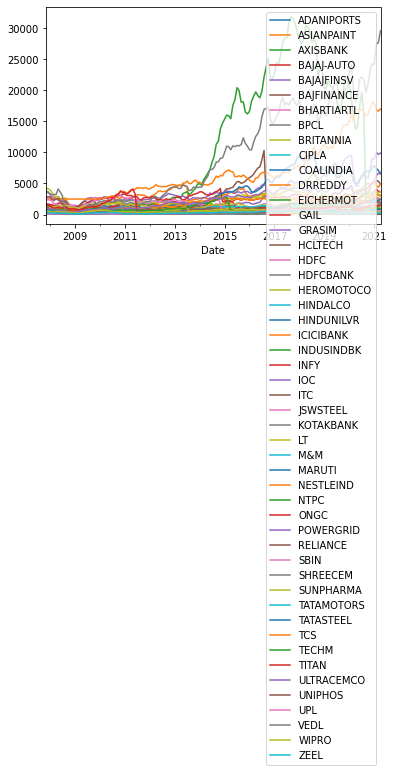

In [ ]:
#Checking for stationarity
stocks_dfm.plot()

By looking plots of every stocks we can tell that these are not stationary time series.Hence we have to convert it into stationary time series.

In [ ]:
stocks_dfm1=stocks_dfm.reset_index()
import plotly.express as px
for i in stocks_dfm.columns: 
    fig = px.line(stocks_dfm1, x='Date', y=i, title=i+' stocks')

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")


            ])
        ) 
    )
    fig.show()

By looking at these visualisations too,we can tell that this is not stationary.That is the mean and standard deviation varying too much with respect to time.There are trends for every stock i.e upward trend or downward trend.

#Making series stationary

<ipython-input-23-a3dec5db15d0>:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



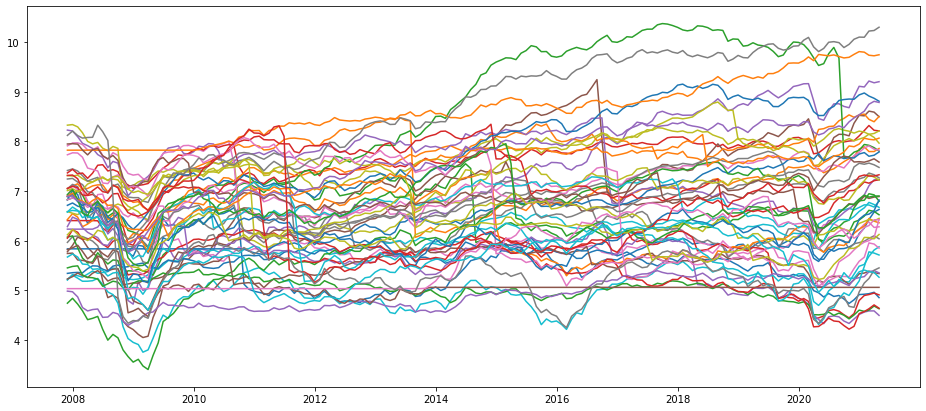

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

In [ ]:
'''plt.figure(figsize=(16,7))
fig=plt.figure(50)'''
stocks_log = {}
for i in stocks_dfm.columns:
  plt.figure(figsize=(16,7))
  fig=plt.figure(1)
  stocks_log[i]=np.log(stocks_dfm[i])
  plt.plot(stocks_log[i])

In [ ]:
stocks_dfm.columns

Index(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV',
       'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA',
       'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK',
       'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI',
       'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN',
       'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM',
       'TITAN', 'ULTRACEMCO', 'UNIPHOS', 'UPL', 'VEDL', 'WIPRO', 'ZEEL'],
      dtype='object')

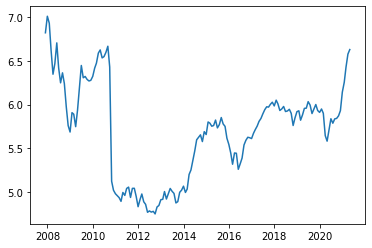

In [ ]:
#Lets try plotting one stock
plt.plot(stocks_log['ADANIPORTS'])

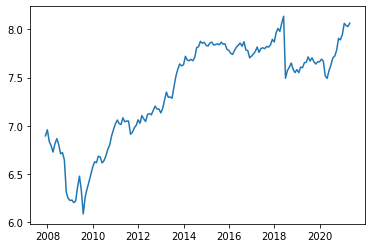

In [ ]:
plt.plot(stocks_log['TCS'])

So it is still not that stationary.

<ipython-input-27-14e39e0c8fa2>:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



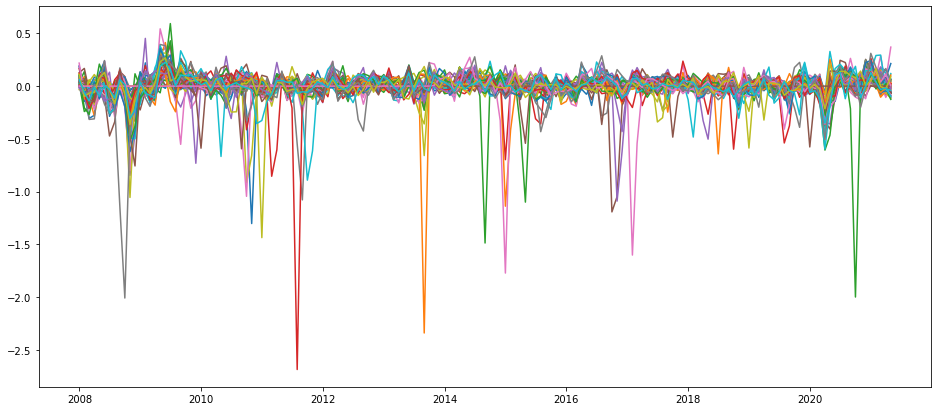

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

In [ ]:
stocks_log_diff = {}
for i in stocks_dfm.columns:
  plt.figure(figsize=(16,7))
  fig=plt.figure(1)
  stocks_log_diff[i]=stocks_log[i]-stocks_log[i].shift()
  plt.plot(stocks_log_diff[i])

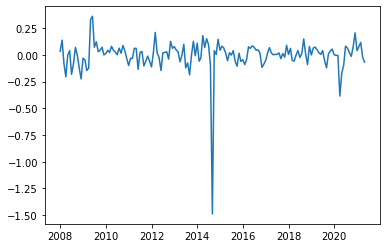

In [ ]:
plt.plot(stocks_log_diff['AXISBANK'])

So now we can observe that its more or less stationary i.e it fluctuates around constant mean.

#Splittig the data

In [ ]:
'''train = stocks_log_diff[( stocks_log_diff.index.get_level_values(0) >='2007-11-30' ) &(stocks_log_diff.index.get_level_values(0) <='2019-12-31' )]
test = stocks_log_diff[(stocks_log_diff.index.get_level_values(0) >'2019-12-31' )]'''


"train = stocks_log_diff[( stocks_log_diff.index.get_level_values(0) >='2007-11-30' ) &(stocks_log_diff.index.get_level_values(0) <='2019-12-31' )]\ntest = stocks_log_diff[(stocks_log_diff.index.get_level_values(0) >'2019-12-31' )]"

In [ ]:
stocks_dfm.head()

ADANIPORTS   ASIANPAINT     AXISBANK  BAJAJ-AUTO  BAJAJFINSV  \
Date                                                                        
2007-11-30   915.637500   998.175000   921.825000      604.75       509.1   
2007-12-31  1105.776316  1020.505263   953.365789      604.75       509.1   
2008-01-31  1021.645652  1117.910870  1094.467391      604.75       509.1   
2008-02-29   752.285714  1146.852381  1012.245238      604.75       509.1   
2008-03-31   570.563889  1154.558333   823.638889      604.75       509.1   

            BAJFINANCE  BHARTIARTL        BPCL    BRITANNIA       CIPLA  ...  \
Date                                                                     ...   
2007-11-30  322.987500  920.037500  390.012500  1496.262500  182.887500  ...   
2007-12-31  367.136842  956.321053  437.876316  1482.171053  204.294737  ...   
2008-01-31  434.319565  902.002174  443.797826  1508.534783  199.502174  ...   
2008-02-29  414.445238  871.285714  438.371429  1407.071429  193.950000  ...   
2008-03-31  353.163889  788.833333  420.777778  1334.166667  206.066667  ...   

             TATASTEEL          TCS        TECHM        TITAN  ULTRACEMCO  \
Date                                                                        
2007-11-30  822.412500   987.675000  1022.075000  1499.875000  987.712500   
2007-12-31  862.110526  1051.802632  1129.710526  1512.494737  988.634211   
2008-01-31  808.417391   931.245652   920.673913  1403.495652  902.836957   
2008-02-29  789.688095   894.995238   703.571429  1138.902381  876.923810   
2008-03-31  712.333333   834.813889   666.294444  1015.261111  827.036111   

               UNIPHOS    UPL         VEDL       WIPRO        ZEEL  
Date                                                                
2007-11-30  337.237500  153.8  3357.700000  454.075000  290.375000  
2007-12-31  349.576316  153.8  3665.081579  506.431579  308.852632  
2008-01-31  368.506522  153.8  3346.567391  459.002174  290.519565  
2008-02-29  325.654762  153.8  3181.347619  429.380952  252.266667  
2008-03-31  280.080556  153.8  3221.211111  404.766667  250.122222  

[5 rows x 50 columns]

In [ ]:
train = stocks_dfm[( stocks_dfm.index.get_level_values(0) >='2007-11-30' ) &(stocks_dfm.index.get_level_values(0) <='2019-12-31' )]
test = stocks_dfm[(stocks_dfm.index.get_level_values(0) >'2019-12-31' )]

In [ ]:
len(test)

16

#ARIMA

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1622.971, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1618.922, Time=0.31 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1607.045, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1621.468, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1605.178, Time=0.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1607.042, Time=0.44 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1603.678, Time=0.29 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1605.409, Time=0.53 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1605.416, Time=0.62 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1616.951, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1598.393, Time=0.32 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept

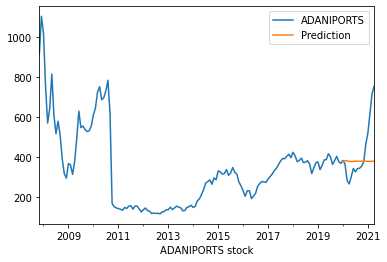

Results of sklearn.metrics:
MAE: 105.02265700821489
RMSE: 153.43306117118962
R-Squared: -0.08858776660436551
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2120.838, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2116.847, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2120.575, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2120.654, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2114.879, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2118.838, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2118.838, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2118.585, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2118.609, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2120.388, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.008 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


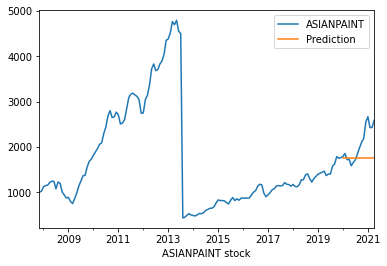

Results of sklearn.metrics:
MAE: 340.65240895438944
RMSE: 461.7101397284864
R-Squared: -0.6489333763227332
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1838.506, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1836.910, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1835.747, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1836.519, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1836.242, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1836.746, Time=0.67 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1836.136, Time=0.24 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1837.848, Time=0.17 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1837.516, Time=0.42 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1837.113, Time=0.3

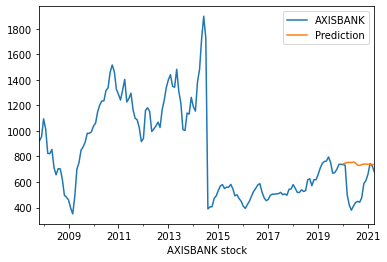

Results of sklearn.metrics:
MAE: 181.18984632142877
RMSE: 225.0722581445793
R-Squared: -1.9271035147927722
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1844.905, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1840.959, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1840.108, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1845.364, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1842.198, Time=0.27 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.30 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1842.022, Time=1.39 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1840.272, Time=0.89 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1843.161, Time=0.17 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1842.007, Time=0.60 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1841.934, Time=0.3

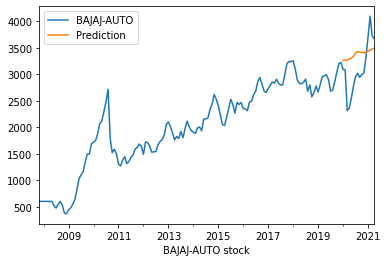

Results of sklearn.metrics:
MAE: 444.0847700598987
RMSE: 512.7731755049878
R-Squared: -0.12215282482695011
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1994.490, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1990.490, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1974.460, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1959.840, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1998.126, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1957.841, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1959.840, Time=0.38 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1959.469, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1959.180, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1972.506, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1958.548, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1960.825

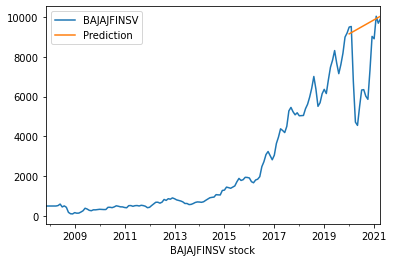

Results of sklearn.metrics:
MAE: 2188.2285029629024
RMSE: 2759.844153091861
R-Squared: -1.1094063289751857
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2301.724, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2297.985, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2299.110, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2298.104, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2296.210, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2299.750, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2299.764, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2297.331, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2296.366, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2296.771, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.087 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


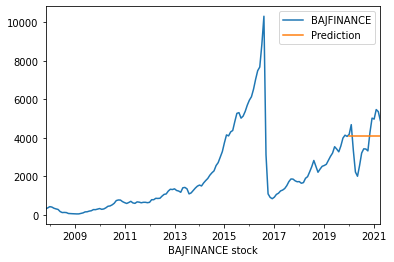

Results of sklearn.metrics:
MAE: 958.4758447259658
RMSE: 1091.2420698753274
R-Squared: -0.02664073608614803
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1491.994, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1488.161, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1487.705, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1487.210, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1487.100, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1489.995, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1489.993, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1485.749, Time=0.09 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1487.704, Time=0.24 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1489.702, Time=0.60 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1486.550, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1487.227, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=14

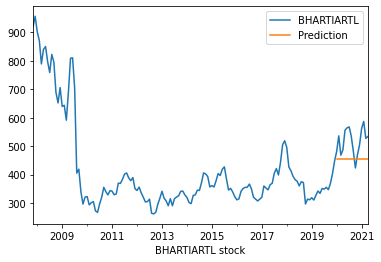

Results of sklearn.metrics:
MAE: 66.3975734268964
RMSE: 76.44183510430933
R-Squared: -1.994299845819505
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1571.594, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1569.704, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1561.238, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1556.535, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1567.729, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1554.892, Time=0.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1556.555, Time=0.32 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1558.488, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1556.381, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1556.151, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1559.644, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1552.910, T

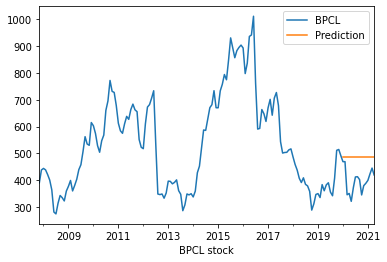

Results of sklearn.metrics:
MAE: 88.8886446458808
RMSE: 98.44668412650337
R-Squared: -4.412696533447619
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2048.397, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2044.464, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2045.747, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2046.288, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2042.689, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2046.453, Time=0.08 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2046.454, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2043.770, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2044.303, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2043.859, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.379 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


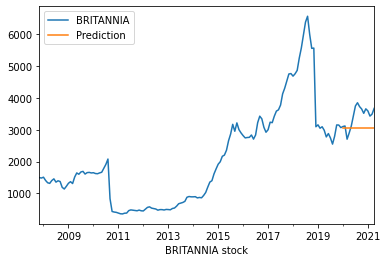

Results of sklearn.metrics:
MAE: 418.54417184987324
RMSE: 478.18687955973047
R-Squared: -1.1806025894282905
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1353.294, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1351.165, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1349.746, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1349.919, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1350.029, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1347.845, Time=0.06 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1349.775, Time=0.32 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1350.236, Time=0.46 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1349.830, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1349.836, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1347.994, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=1346.44

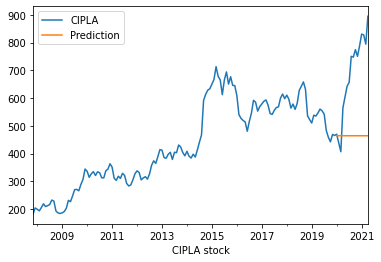

Results of sklearn.metrics:
MAE: 229.83026745353283
RMSE: 262.9543945242113
R-Squared: -2.283858663922886
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1208.935, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1207.176, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1200.327, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1194.176, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1205.790, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1192.480, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1194.225, Time=0.31 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1188.654, Time=0.14 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1190.383, Time=0.41 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1190.319, Time=0.44 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1191.023, Time=0.79 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1198.934,

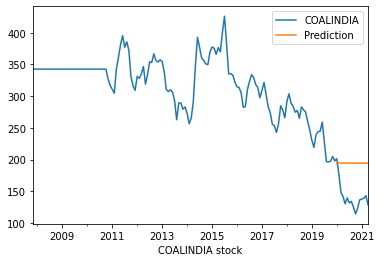

Results of sklearn.metrics:
MAE: 54.77679269577296
RMSE: 57.5943006311843
R-Squared: -6.905415911788493
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1867.709, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1864.005, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1867.659, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1867.646, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1863.608, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1865.755, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1865.739, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1865.881, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1865.879, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1867.908, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.265 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


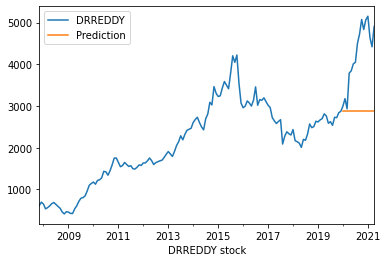

Results of sklearn.metrics:
MAE: 1383.5266241397094
RMSE: 1560.498700808913
R-Squared: -3.673912031355596
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2423.834, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2420.439, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2416.608, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2414.837, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2421.523, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2413.127, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2414.931, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2416.310, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2414.452, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2414.560, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2414.683, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2416.525, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2413

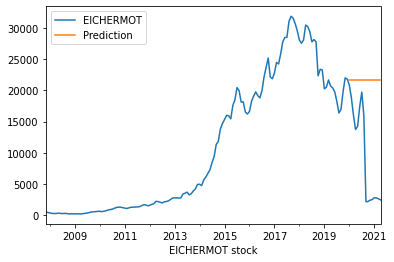

Results of sklearn.metrics:
MAE: 11849.392957619519
RMSE: 14020.390802945294
R-Squared: -2.500000025924572
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1405.030, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1401.205, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1398.109, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1394.048, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1399.921, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1392.223, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1394.040, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1396.020, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1391.281, Time=0.18 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1392.813, Time=0.40 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1392.809, Time=0.44 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1394.808, Time=0.82 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=139

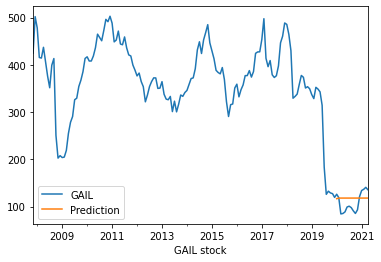

Results of sklearn.metrics:
MAE: 20.30912757087747
RMSE: 22.431901634880674
R-Squared: -0.2118361185609896
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2095.704, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2093.316, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2088.758, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2089.006, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2091.890, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2088.025, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2088.922, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2090.452, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2089.770, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2089.893, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2088.059, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2088.552, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=208

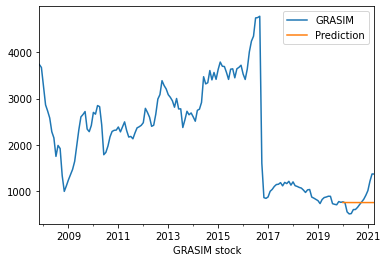

Results of sklearn.metrics:
MAE: 209.13609894198288
RMSE: 283.2945965920732
R-Squared: -0.05825305471289011
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1730.712, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1728.608, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1728.973, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1726.735, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1726.694, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1728.754, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1728.712, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1728.206, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1725.406, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1726.764, Time=0.29 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1728.723, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1712.389, Time=0.23 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=17

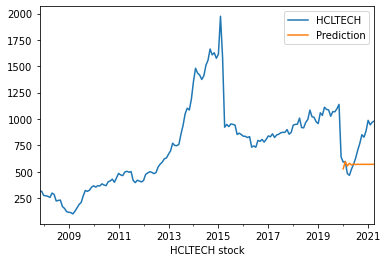

Results of sklearn.metrics:
MAE: 196.71023282952456
RMSE: 246.90537545352072
R-Squared: -0.8424259000117365
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1911.029, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1908.109, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1890.148, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1865.311, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1906.138, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1864.045, Time=0.20 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1865.476, Time=0.52 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1866.459, Time=1.29 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1864.813, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1864.506, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1888.230, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1866.243, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=18

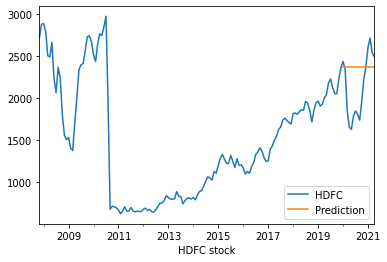

Results of sklearn.metrics:
MAE: 364.5845960646411
RMSE: 442.3545597823199
R-Squared: -0.4717911017076999
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1868.627, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1865.005, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1839.771, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1823.432, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1863.052, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1821.456, Time=0.36 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1823.429, Time=0.49 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1821.516, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1821.920, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1837.767, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1822.961, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1819.494,

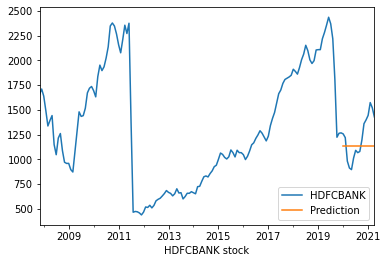

Results of sklearn.metrics:
MAE: 192.47147429726988
RMSE: 225.59746076927317
R-Squared: -0.12796025904848896
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1825.201, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1823.773, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1824.001, Time=0.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1824.260, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1822.917, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1823.618, Time=0.29 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1823.907, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1824.582, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1824.461, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1822.166, Time=0.24 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1822.008, Time=0.74 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=1822.773, Time=1.65 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1

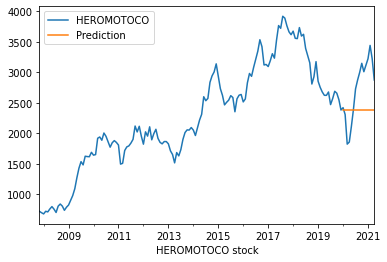

Results of sklearn.metrics:
MAE: 517.8131092740056
RMSE: 596.6940744724449
R-Squared: -0.4787669042967646
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1157.904, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1161.531, Time=0.20 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1152.684, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1151.034, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1159.551, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1152.230, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1149.923, Time=0.39 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1152.137, Time=0.25 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1150.957, Time=1.01 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1149.921, Time=0.85 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1148.396, Time=0.71 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1155.478, Time=0.47 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=1151

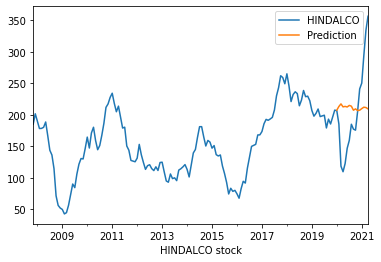

Results of sklearn.metrics:
MAE: 60.16174820641697
RMSE: 73.2457479945288
R-Squared: -0.04409313887063537
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1506.989, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1503.772, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1499.667, Time=0.64 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1498.612, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1513.249, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1498.368, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1498.618, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1500.608, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1500.368, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1500.368, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1499.551, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1495.324, Time=0.34 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1494

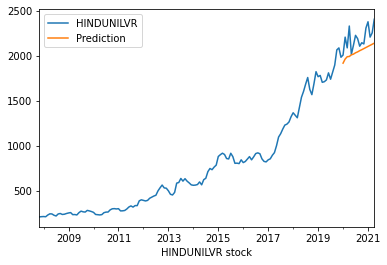

Results of sklearn.metrics:
MAE: 147.9049851952932
RMSE: 174.70660520968016
R-Squared: -1.2926597597996738
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1801.545, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1798.069, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1800.667, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1800.524, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1796.257, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1799.859, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1799.818, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1798.841, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1798.729, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1800.619, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.681 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


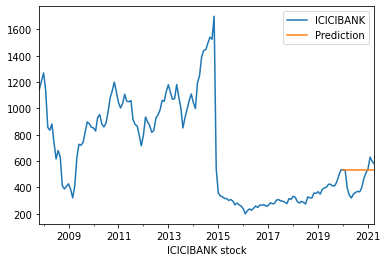

Results of sklearn.metrics:
MAE: 104.64327203569692
RMSE: 127.425213355348
R-Squared: -0.6096998783846388
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1568.365, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1566.062, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1560.119, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1556.053, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1568.698, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1556.423, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1557.897, Time=0.42 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1557.523, Time=1.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1555.904, Time=0.26 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1557.887, Time=0.46 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1559.816, Time=1.71 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1566.369, Time=0.28 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1551

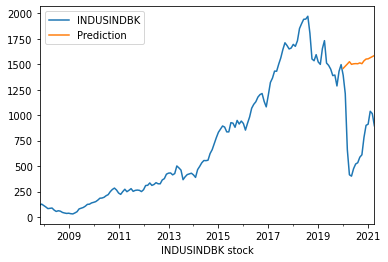

Results of sklearn.metrics:
MAE: 750.7604924115568
RMSE: 803.1596861363964
R-Squared: -6.909143943348796
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1997.082, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1993.664, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1997.143, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1997.084, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1991.759, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1995.257, Time=0.19 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1995.223, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1995.551, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1995.519, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1996.712, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.666 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


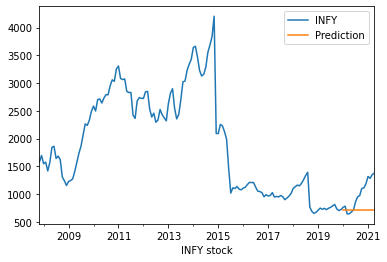

Results of sklearn.metrics:
MAE: 288.1957891243879
RMSE: 368.19757943997166
R-Squared: -1.0315245763443133
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1509.304, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1506.870, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1501.509, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1507.915, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1499.660, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1501.519, Time=0.38 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1503.197, Time=0.78 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1500.201, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1498.283, Time=0.16 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1500.133, Time=0.44 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1500.126, Time=0.48 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=1501.862

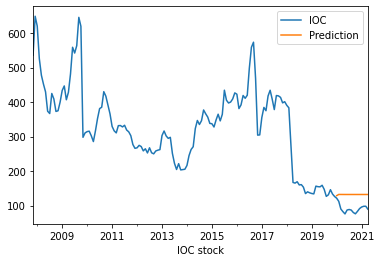

Results of sklearn.metrics:
MAE: 40.86869669197236
RMSE: 42.69505588074325
R-Squared: -12.032084729419287
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1279.715, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1278.534, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1278.763, Time=0.31 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1278.079, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1276.586, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1278.741, Time=0.23 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1278.333, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1278.477, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1278.151, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1279.798, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.871 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


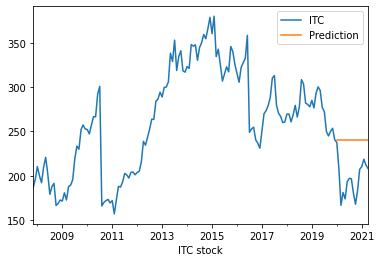

Results of sklearn.metrics:
MAE: 44.108777903978506
RMSE: 48.09833028755523
R-Squared: -5.288852762140257
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1846.956, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1844.054, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1842.723, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1842.793, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1842.242, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1845.104, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1845.086, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1841.131, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1842.686, Time=0.41 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1844.203, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1843.105, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1843.083, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1841

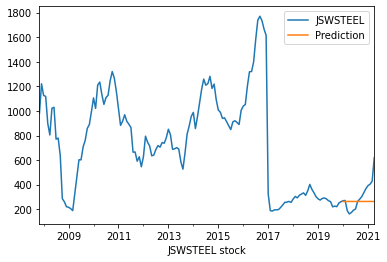

Results of sklearn.metrics:
MAE: 89.83960162317507
RMSE: 122.92266123702315
R-Squared: -0.11941141401367728
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1677.819, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1659.519, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1655.963, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1676.149, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1654.903, Time=0.14 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1655.891, Time=0.34 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1657.872, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1656.870, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1656.858, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1659.434, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1657.223, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1653.15

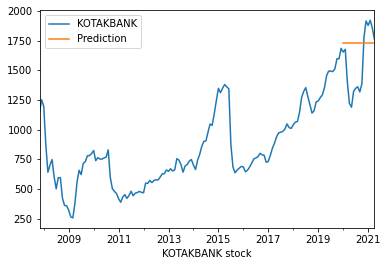

Results of sklearn.metrics:
MAE: 259.530181635417
RMSE: 307.23152612106156
R-Squared: -0.41430230948695
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2254.510, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2267.019, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1962.768, Time=0.75 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2111.036, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2578.696, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1960.867, Time=0.15 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1962.745, Time=0.61 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1953.461, Time=0.28 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1955.453, Time=1.09 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1955.451, Time=0.68 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=1954.693, Time=0

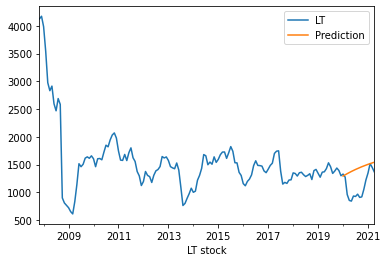

Results of sklearn.metrics:
MAE: 317.47638057269774
RMSE: 374.1719806716187
R-Squared: -1.7357601080260263
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1694.376, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1693.109, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1689.740, Time=0.87 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1690.336, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1691.148, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1689.863, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1690.598, Time=1.03 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1691.039, Time=0.48 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1690.048, Time=0.23 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1692.100, Time=1.63 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1693.134, Time=0.18 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1691.738, Time=0.33 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=169

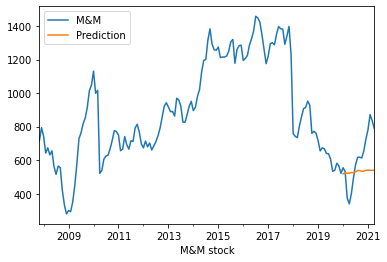

Results of sklearn.metrics:
MAE: 140.10699026890796
RMSE: 170.04256533301236
R-Squared: -0.17275327814790264
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2035.205, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2022.450, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2015.489, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2036.882, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2015.177, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2016.046, Time=0.51 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2016.862, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2016.635, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2022.616, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2018.317, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2015.273, T

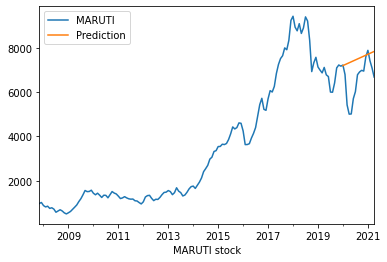

Results of sklearn.metrics:
MAE: 949.3560862627528
RMSE: 1203.9566059425908
R-Squared: -0.9458706819948899
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2079.447, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2081.564, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2075.502, Time=0.48 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2076.196, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2089.218, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2080.417, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2077.098, Time=1.37 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2077.272, Time=0.43 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2075.352, Time=0.26 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2077.210, Time=0.80 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2079.222, Time=1.10 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2077.532, Time=0.16 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=207

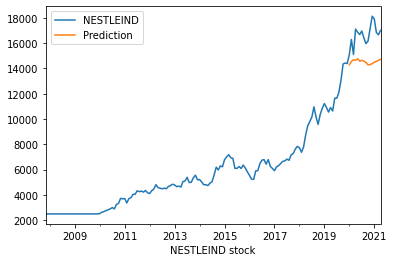

Results of sklearn.metrics:
MAE: 2111.9242070272703
RMSE: 2261.296490908065
R-Squared: -6.941600828003175
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1049.277, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1045.371, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1048.838, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1048.349, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1044.628, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1047.311, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1047.316, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1046.860, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1046.360, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1046.147, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.578 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


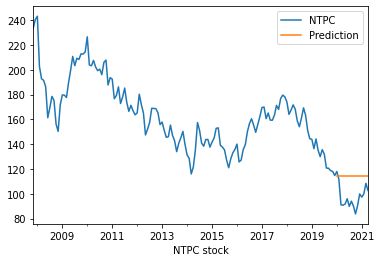

Results of sklearn.metrics:
MAE: 17.90281170647304
RMSE: 19.61872402579189
R-Squared: -3.8825394539048803
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1665.447, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1662.744, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1642.313, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1636.271, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1662.082, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1634.289, Time=0.14 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1636.271, Time=0.38 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1637.812, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1636.113, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1636.060, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1640.341, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1637.500, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1633

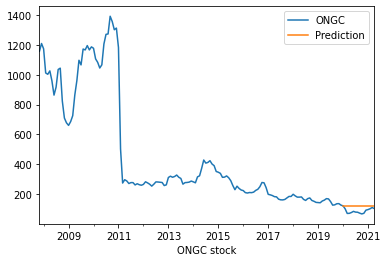

Results of sklearn.metrics:
MAE: 34.24027257952002
RMSE: 37.81657668818845
R-Squared: -4.549510971000029
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=954.532, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=956.341, Time=0.21 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=951.111, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=948.118, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=954.616, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=949.926, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=950.051, Time=0.59 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=950.112, Time=0.63 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=948.157, Time=0.19 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=952.088, Time=1.30 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=952.806, Time=0.13 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=947.684, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.21 se

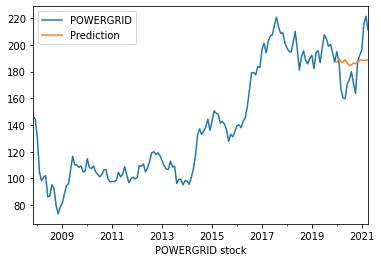

Results of sklearn.metrics:
MAE: 15.560177605198634
RMSE: 18.623819021406824
R-Squared: 0.04264345181054019
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2186.057, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2215.094, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1860.747, Time=0.64 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2502.311, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1858.765, Time=0.12 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1860.747, Time=0.43 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1850.492, Time=0.21 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1852.480, Time=0.94 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1852.480, Time=0.67 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=1846.342, Time=0.

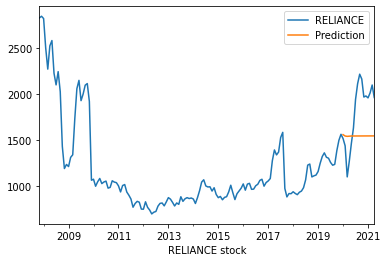

Results of sklearn.metrics:
MAE: 373.37552048585525
RMSE: 420.4607277052353
R-Squared: -0.5885604007980185
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1948.895, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1944.873, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1930.180, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1924.727, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1943.557, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1922.799, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1924.741, Time=0.50 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1926.335, Time=0.90 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1924.783, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1924.778, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1928.205, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1921.205

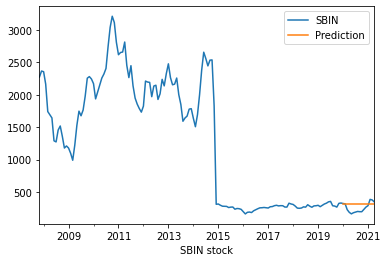

Results of sklearn.metrics:
MAE: 83.9436626832725
RMSE: 97.15855517922354
R-Squared: -0.77729336657104
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2288.035, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2285.683, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2282.684, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2276.705, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2289.771, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2275.248, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2276.817, Time=0.34 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2278.675, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2272.113, Time=0.30 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2274.230, Time=0.56 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2274.202, Time=0.50 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2275.929, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2281.18

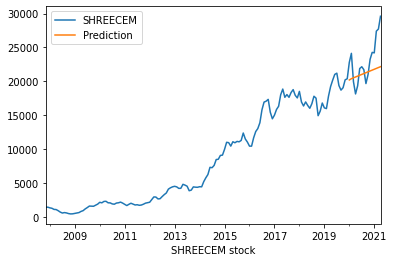

Results of sklearn.metrics:
MAE: 2562.0206032013884
RMSE: 3246.708912811358
R-Squared: -0.08704073279912339
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1853.466, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1856.144, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1855.882, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1851.621, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1855.063, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1855.096, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1854.468, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1854.168, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1854.823, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.709 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


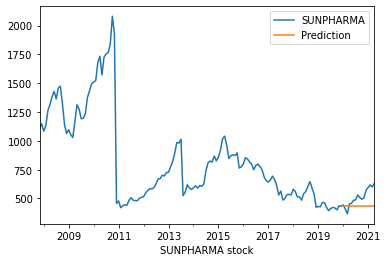

Results of sklearn.metrics:
MAE: 88.79901232154411
RMSE: 107.62875975679425
R-Squared: -1.0888684142187666
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1629.281, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1630.634, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1603.286, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1593.240, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1629.114, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1591.286, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1593.256, Time=0.36 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1593.286, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1593.286, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1601.438, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1594.221, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1589.541

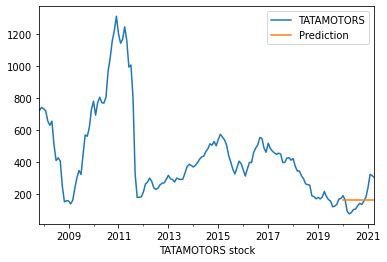

Results of sklearn.metrics:
MAE: 64.00219938046943
RMSE: 80.76393879579646
R-Squared: -0.010072549032188682
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1884.351, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1555.267, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1717.061, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2225.696, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1555.523, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1545.107, Time=1.35 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1546.907, Time=2.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1550.041, Time=0.76 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1880.944, Time=1.97 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1535.032, Time=1.80 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1541.597, Time=0.73 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=1536.30

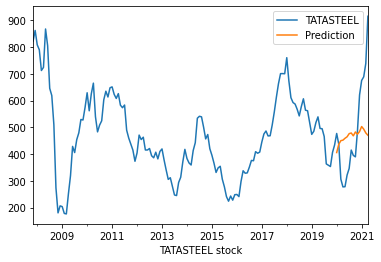

Results of sklearn.metrics:
MAE: 143.57164090844444
RMSE: 176.19072564980277
R-Squared: 0.07026847813615078
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1891.612, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1888.604, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1889.184, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1888.380, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1886.951, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1890.292, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1890.249, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1887.360, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1886.558, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1888.399, Time=0.46 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1889.691, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1887.733, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=18

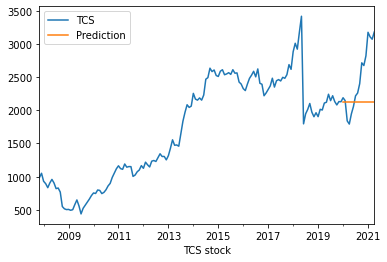

Results of sklearn.metrics:
MAE: 455.6121589534953
RMSE: 586.3027473797807
R-Squared: -0.5348517424930905
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1879.386, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1875.543, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1853.492, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1843.712, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1873.562, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1841.728, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1843.717, Time=0.25 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1845.509, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1843.650, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1843.633, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1851.495, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1845.630, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1839

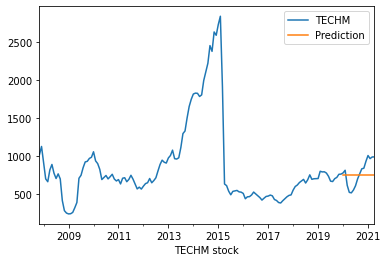

Results of sklearn.metrics:
MAE: 148.98902686772414
RMSE: 169.94642271176332
R-Squared: -0.021539143261047444
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2056.296, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2053.651, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2047.783, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2046.744, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2051.660, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2045.897, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2046.794, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2048.722, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2047.915, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2047.834, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2046.730, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2043.

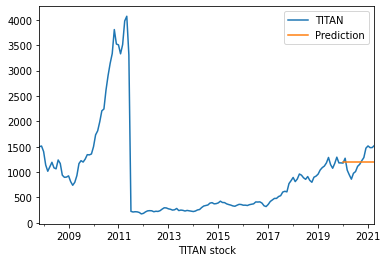

Results of sklearn.metrics:
MAE: 186.49126310093416
RMSE: 218.0562438909086
R-Squared: -0.020206189860461965
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1867.234, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1872.415, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1864.454, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1864.568, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1873.276, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1871.428, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1866.416, Time=1.06 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1866.425, Time=0.67 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1865.263, Time=0.24 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1868.379, Time=0.95 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1865.269, Time=0.33 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1863.117, Time=1.10 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1

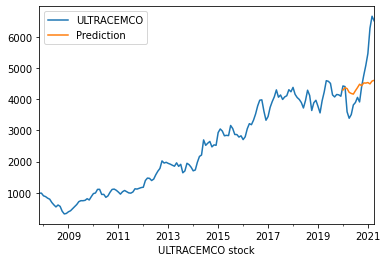

Results of sklearn.metrics:
MAE: 723.369966385261
RMSE: 962.7644544267763
R-Squared: 0.14746078314624722
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1557.076, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1255.016, Time=0.49 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1386.570, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1919.209, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1256.739, Time=0.12 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1256.949, Time=2.22 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1256.808, Time=0.83 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1254.811, Time=0.30 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1256.809, Time=0.91 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1547.112, Time=0.30 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1233.415, Time=

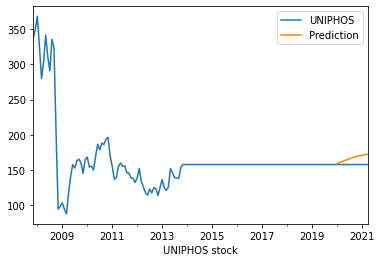

Results of sklearn.metrics:
MAE: 9.02352137955636
RMSE: 10.015718933057792
R-Squared: 0.0
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1488.256, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1486.290, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1482.110, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1479.845, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1485.028, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1478.240, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1479.783, Time=0.31 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1481.173, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1475.931, Time=0.18 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1477.478, Time=0.54 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1477.590, Time=0.62 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1478.107, Time=0.79 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1480.594, Time=0.08 

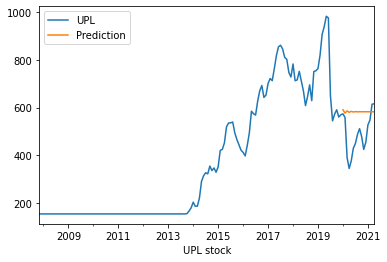

Results of sklearn.metrics:
MAE: 104.5369340096988
RMSE: 125.41150821244834
R-Squared: -1.4392515156883974
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2364.244, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2362.825, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1991.774, Time=0.42 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2209.858, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2397.691, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1990.191, Time=0.08 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1991.716, Time=0.32 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1993.715, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1959.418, Time=0.16 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1961.402, Time=0.53 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1961.398, Time=0.43 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=1963.400, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=196

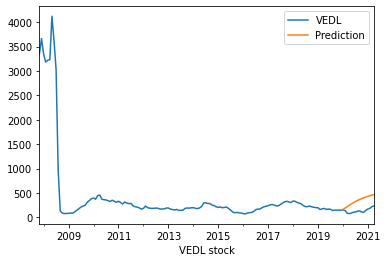

Results of sklearn.metrics:
MAE: 203.4656897369877
RMSE: 217.51169437708145
R-Squared: -21.393181666161784
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1471.525, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1467.599, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1457.413, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1455.584, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1465.813, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1453.599, Time=0.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1455.586, Time=0.37 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1457.428, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1455.598, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1455.598, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1455.655, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1457.598, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=145

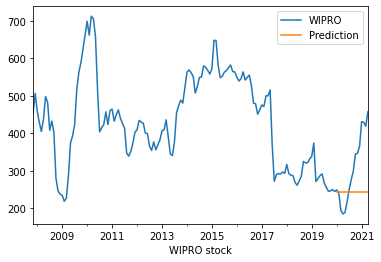

Results of sklearn.metrics:
MAE: 86.54182048911093
RMSE: 111.0559580906478
R-Squared: -0.47964588748477843
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1320.233, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1314.310, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1313.891, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1318.233, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1311.984, Time=0.14 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1313.903, Time=0.24 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1313.918, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1313.904, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1312.345, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1315.365, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1309.984, Tim

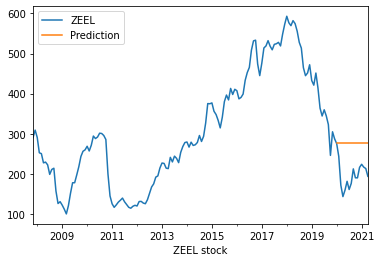

Results of sklearn.metrics:
MAE: 79.13359669834527
RMSE: 85.71318854479398
R-Squared: -5.773542600538558


In [ ]:
import pmdarima as pm
import sklearn.metrics as metrics
for i in train.columns:
    model = pm.auto_arima(train[i], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)
    model.fit(train[i])
    forecast=model.predict(n_periods=16, return_conf_int=True)
    forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

    mae = metrics.mean_absolute_error(test[i], forecast_df)
    mse = metrics.mean_squared_error(test[i], forecast_df)
    rmse = np.sqrt(mse) #mse**(0.5)  
    r2 = metrics.r2_score(test[i],forecast_df['Prediction'])
    print(pd.concat([stocks_dfm[i],forecast_df],axis=1).plot())
    plt.plot(stocks_dfm[i])
    plt.plot(forecast_df)
    plt.xlabel(i+' stock')
    plt.show()

    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("RMSE:", rmse)
    print("R-Squared:", r2)


We have run the auto arima and found the best p,d,q values.And we have used those values and forecast the next time series.We can see the actual vs forecasted values in plots above

#FBProphet

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 108 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.5 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6752322 sha256=26088623fc29decc7f1d24d060825360bd551eae1d6a415f49b3ba7f75fed26f
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


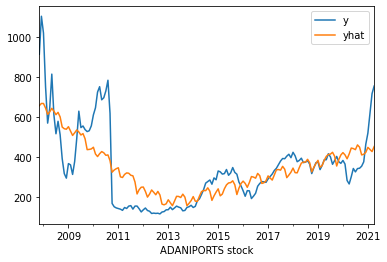

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 90.40325992047106
RMSE: 124.27264062624124
R-Squared: 0.5863350973577829


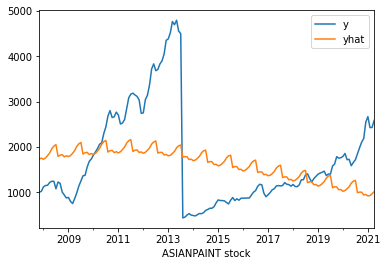

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 835.1634220002193
RMSE: 1041.7786901537743
R-Squared: 0.06605470437908789


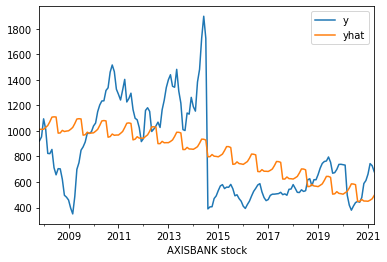

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 241.24835461241517
RMSE: 293.40874376286615
R-Squared: 0.30255329483319293


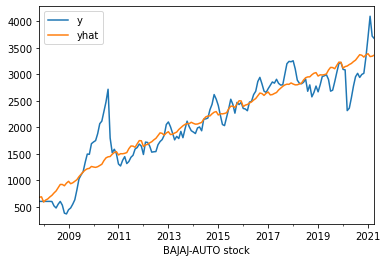

Results of sklearn.metrics:
MAE: 217.43441334807784
RMSE: 308.1637336630744
R-Squared: 0.8589551275549405


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


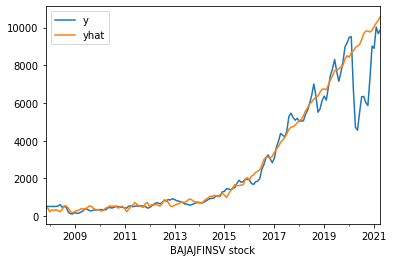

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 399.0139915043819
RMSE: 885.4156008233637
R-Squared: 0.902970018435416


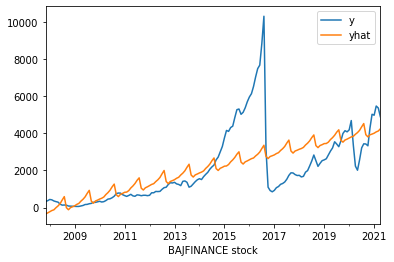

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 998.175747551037
RMSE: 1474.5449729494856
R-Squared: 0.4323494407458959


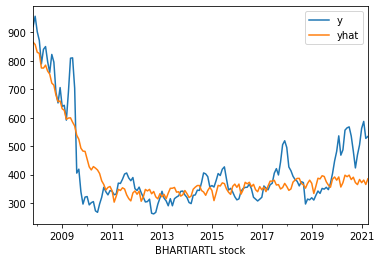

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 56.40947715356557
RMSE: 76.75926105356412
R-Squared: 0.7545606537933242


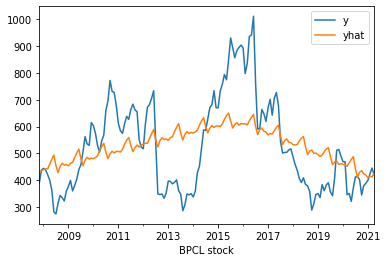

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 120.22877055328479
RMSE: 145.514959435999
R-Squared: 0.28845465726134956


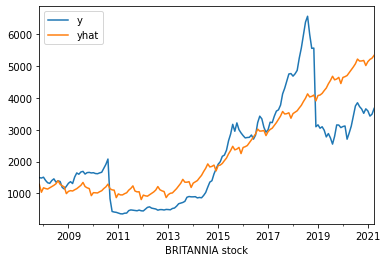

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 727.98384517783
RMSE: 915.8657251835061
R-Squared: 0.6171163143463932


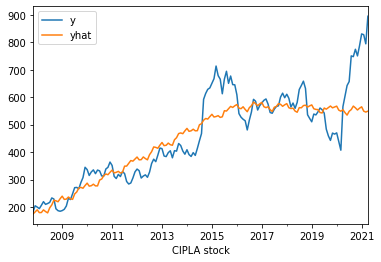

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 58.55060712366304
RMSE: 82.25232867713356
R-Squared: 0.7540308952034398


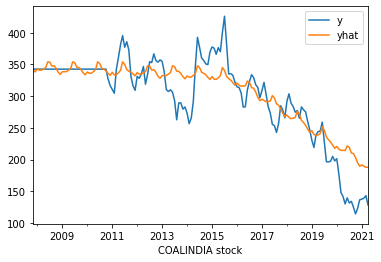

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 24.173944763721003
RMSE: 33.02669737370911
R-Squared: 0.7677476711704523


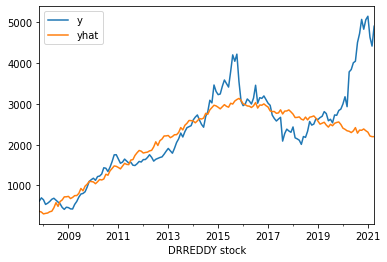

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 414.7975538852354
RMSE: 718.4271737893644
R-Squared: 0.5869969000792302


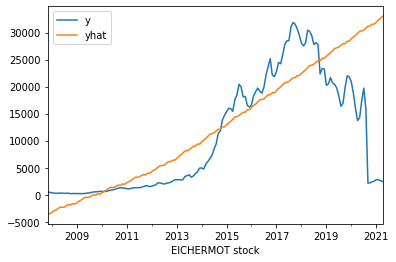

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 5207.099718005443
RMSE: 8211.605720589443
R-Squared: 0.37601866549239105


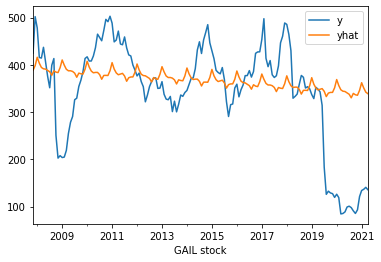

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 74.80100479958485
RMSE: 104.57614384112891
R-Squared: 0.08145663451870744


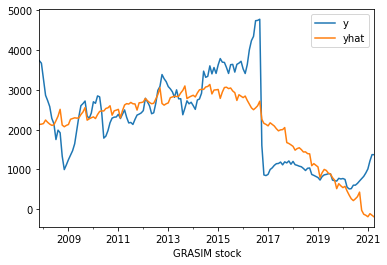

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 516.2592355234401
RMSE: 687.8024218185536
R-Squared: 0.5972234272441774


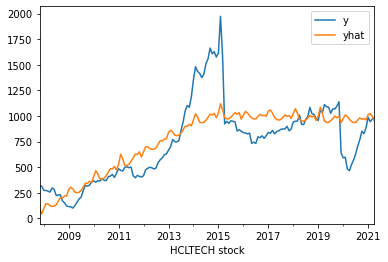

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 170.36331546200984
RMSE: 230.92414726156366
R-Squared: 0.634696349223133


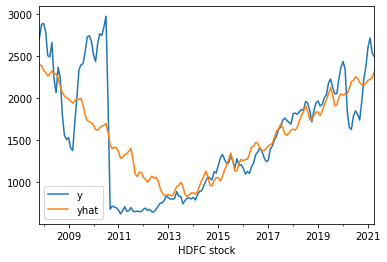

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 284.96098820463845
RMSE: 398.1999334772704
R-Squared: 0.6597073353435214


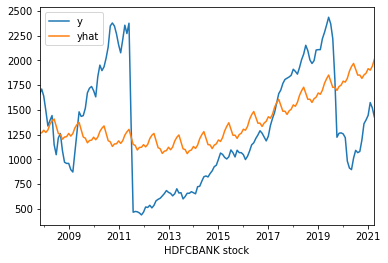

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 439.5278795281807
RMSE: 513.8430233662863
R-Squared: 0.14646609229933305


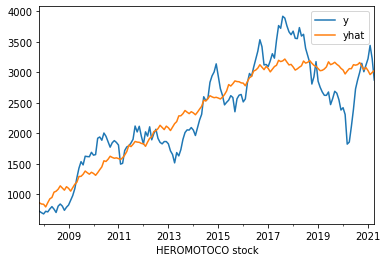

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 295.16198336222175
RMSE: 364.81222482392207
R-Squared: 0.8046133682608543


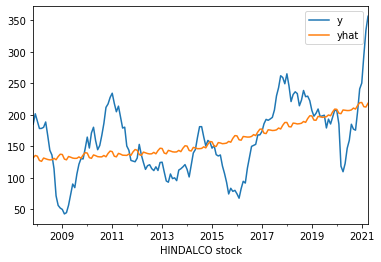

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 38.3707107795691
RMSE: 47.82180985696248
R-Squared: 0.2898802357982828


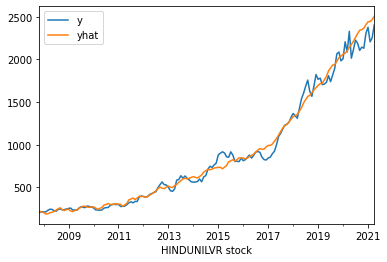

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 51.09472730151702
RMSE: 75.83344570780474
R-Squared: 0.9864787607561779


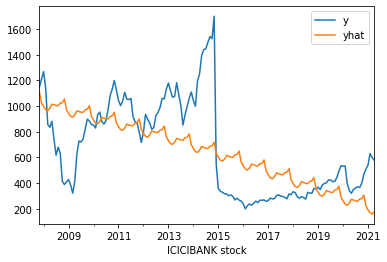

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 240.30305995044282
RMSE: 304.67561676075314
R-Squared: 0.31101656993723037


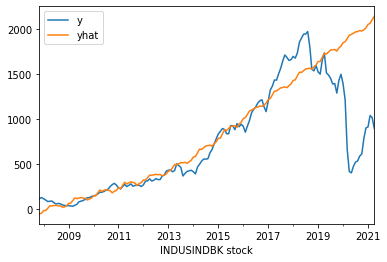

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 206.7929423629748
RMSE: 414.77621530976165
R-Squared: 0.4593531668462225


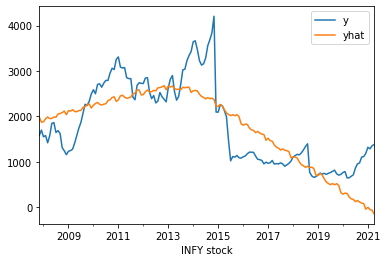

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 473.4207915045902
RMSE: 593.2110607767019
R-Squared: 0.5832789253232245


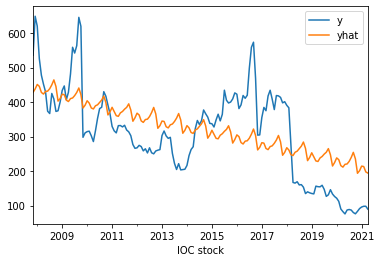

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 89.06499530209733
RMSE: 102.0394922852405
R-Squared: 0.40548551866880034


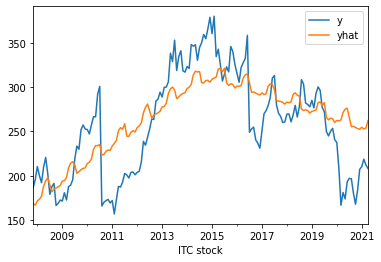

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 33.25575130071573
RMSE: 39.52313004093546
R-Squared: 0.5472817282890369


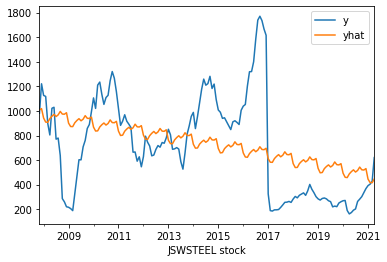

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 291.658253553315
RMSE: 360.77269700999784
R-Squared: 0.1897974377323547


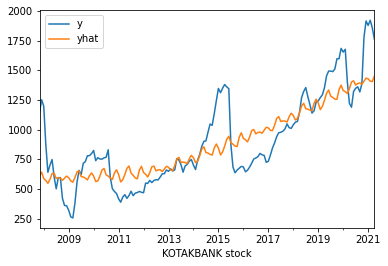

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 168.37556662972528
RMSE: 217.45915422930378
R-Squared: 0.680534433341058


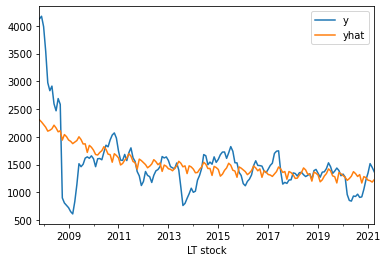

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 286.3213433371387
RMSE: 451.9473357568488
R-Squared: 0.3321762300433101


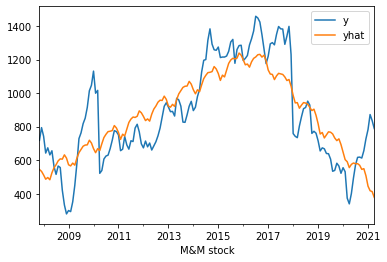

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 142.15139776782252
RMSE: 171.2030572801492
R-Squared: 0.6689214157230774


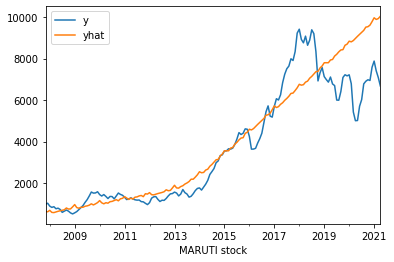

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 797.4873448582006
RMSE: 1216.1968873296828
R-Squared: 0.8049009549175363


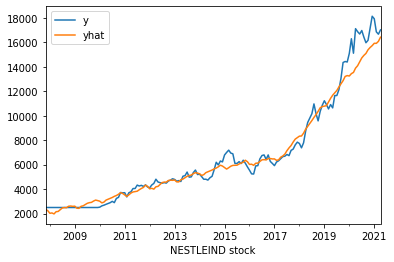

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 481.36486492040143
RMSE: 746.8582146014119
R-Squared: 0.9690868827857636


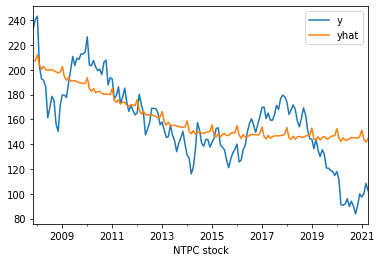

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 18.248378069876697
RMSE: 22.750744534359782
R-Squared: 0.5161434291593288


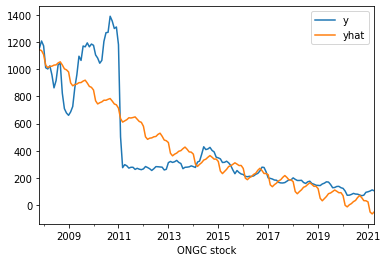

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 134.17630596918875
RMSE: 194.24588468649796
R-Squared: 0.73276166403482


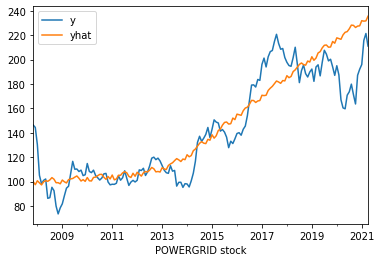

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 14.451468817661123
RMSE: 19.79830014858836
R-Squared: 0.7762097928384231


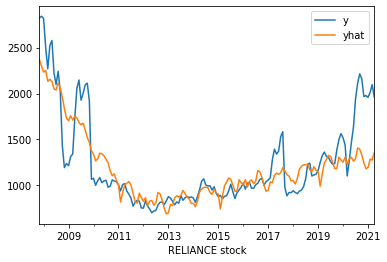

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 190.20838814732875
RMSE: 276.89110343668983
R-Squared: 0.6872872880008496


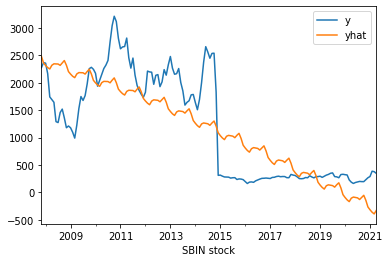

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 489.31967744273595
RMSE: 592.1912314484201
R-Squared: 0.6125007245754852


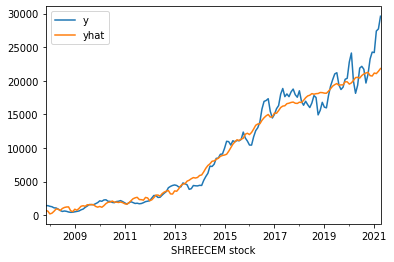

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 963.392696358547
RMSE: 1492.2841292530063
R-Squared: 0.9643441944973326


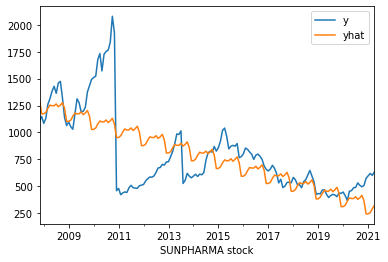

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 200.42495198976596
RMSE: 278.4424175736502
R-Squared: 0.4544762705754033


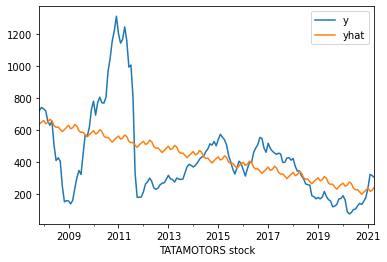

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 168.8900354723806
RMSE: 231.17547200781797
R-Squared: 0.2513088329817972


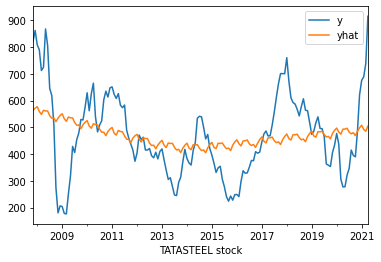

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 112.97816302150882
RMSE: 143.07700584325175
R-Squared: 0.14757333770347159


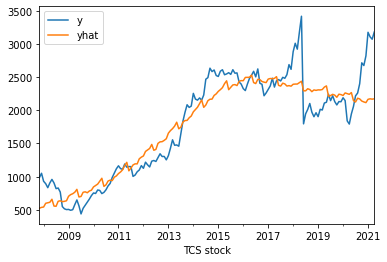

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 226.57616983158772
RMSE: 297.7752659843155
R-Squared: 0.8492021289470247


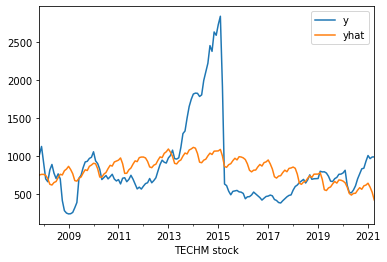

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 314.28656798828035
RMSE: 457.53368003724165
R-Squared: 0.17227639828293373


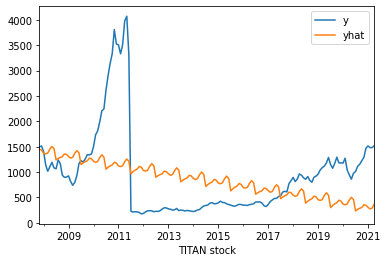

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 642.4992063158893
RMSE: 840.0125668419801
R-Squared: 0.013407152668270972


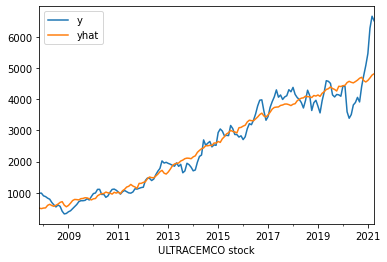

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 251.23096744946133
RMSE: 380.06789174671513
R-Squared: 0.9334337011218914


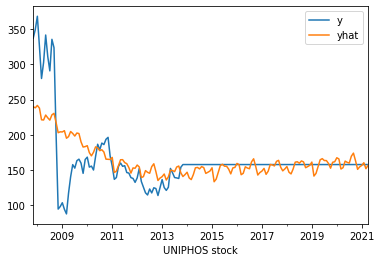

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 20.18062639334188
RMSE: 35.07565602143104
R-Squared: 0.4415090503372583


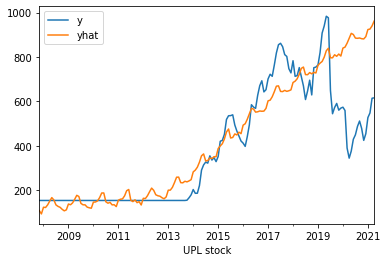

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 92.25557868671409
RMSE: 151.3951135753181
R-Squared: 0.628909949028368


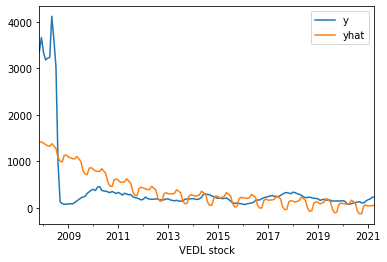

Results of sklearn.metrics:
MAE: 316.58679439157373
RMSE: 580.3399818298253
R-Squared: 0.39371222802923844


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


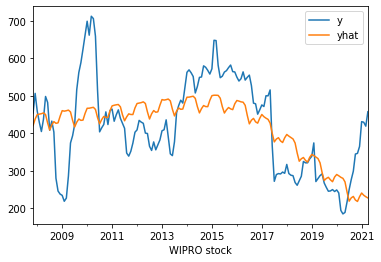

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 78.0519111410189
RMSE: 97.32453161864667
R-Squared: 0.3726669317710861


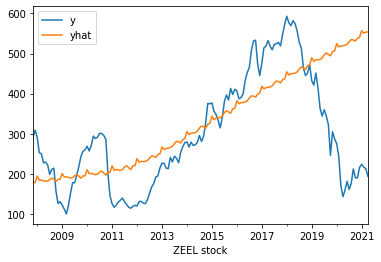

Results of sklearn.metrics:
MAE: 95.0078051342421
RMSE: 131.6989395884045
R-Squared: 0.0607833048230455


In [ ]:
from fbprophet import Prophet
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

for i in stocks_dfm.columns:
    df1=stocks_dfm.reset_index()[['Date',i]].rename({'Date':'ds',i:'y'},  axis='columns')
    train = df1[( df1['ds'] >='2007-11-30' ) &(df1['ds'] <='2019-12-31' )]
    test = df1[(df1['ds'] >'2019-12-31' )]
    m = Prophet(interval_width=0.95,yearly_seasonality=True)
    m.fit(train)
    future = m.make_future_dataframe(periods=16,freq='M')
    forecast = m.predict(future)
    pd.concat([df1.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()
    mae = metrics.mean_absolute_error(df1.set_index('ds')['y'],forecast.set_index('ds')['yhat'])
    mse = metrics.mean_squared_error(df1.set_index('ds')['y'],forecast.set_index('ds')['yhat'])
    rmse = np.sqrt(mse) #mse**(0.5)  
    r2 = metrics.r2_score(df1.set_index('ds')['y'],forecast.set_index('ds')['yhat'])  
    plt.plot(df1.set_index('ds')['y'])
    plt.plot(forecast.set_index('ds')['yhat'])
    plt.xlabel(i+' stock')
    plt.show()
    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

#RNN

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN,LSTM

training_size=int(len(stocks_dfm)*0.8)
test_size=len(stocks_dfm)-training_size

In [ ]:
print(training_size,test_size)

129 33


In [ ]:

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
import numpy

Epoch 1/20
2/2 [==============================] - 5s 1s/step - loss: 0.1820 - val_loss: 0.0329
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0608 - val_loss: 0.0985
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0775 - val_loss: 0.0623
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0458 - val_loss: 0.0267
Epoch 5/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0196 - val_loss: 0.0105
Epoch 6/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0110 - val_loss: 0.0064
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0106 - val_loss: 0.0079
Epoch 8/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0141 - val_loss: 0.0091
Epoch 9/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0155 - val_loss: 0.0079
Epoch 10/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0141 - val_loss: 0.0061
Epoch 11/20
2/2 [==============

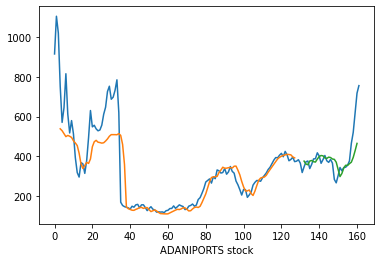

Epoch 1/20
2/2 [==============================] - 5s 668ms/step - loss: 0.0563 - val_loss: 0.0290
Epoch 2/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0272 - val_loss: 0.0274
Epoch 3/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0397 - val_loss: 0.0029
Epoch 4/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0180 - val_loss: 0.0137
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0249 - val_loss: 0.0243
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0262 - val_loss: 0.0123
Epoch 7/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0198 - val_loss: 0.0020
Epoch 8/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0176 - val_loss: 0.0054
Epoch 9/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0189 - val_loss: 0.0041
Epoch 10/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0163 - val_loss: 0.0015
Epoch 11/20
2/2 [===========

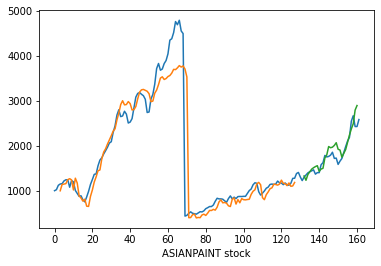

Epoch 1/20
2/2 [==============================] - 11s 1s/step - loss: 0.1602 - val_loss: 0.0672
Epoch 2/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0660 - val_loss: 0.0305
Epoch 3/20
2/2 [==============================] - 0s 62ms/step - loss: 0.1148 - val_loss: 0.0094
Epoch 4/20
2/2 [==============================] - 0s 70ms/step - loss: 0.0345 - val_loss: 0.0292
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0391 - val_loss: 0.0502
Epoch 6/20
2/2 [==============================] - 0s 100ms/step - loss: 0.0434 - val_loss: 0.0291
Epoch 7/20
2/2 [==============================] - 0s 91ms/step - loss: 0.0232 - val_loss: 0.0111
Epoch 8/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0226 - val_loss: 0.0101
Epoch 9/20
2/2 [==============================] - 0s 105ms/step - loss: 0.0308 - val_loss: 0.0110
Epoch 10/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0299 - val_loss: 0.0095
Epoch 11/20
2/2 [===========

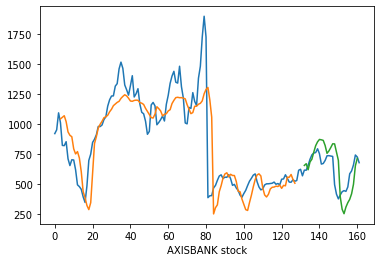

Epoch 1/20
2/2 [==============================] - 10s 2s/step - loss: 0.0773 - val_loss: 0.0721
Epoch 2/20
2/2 [==============================] - 0s 173ms/step - loss: 0.0459 - val_loss: 0.0415
Epoch 3/20
2/2 [==============================] - 0s 74ms/step - loss: 0.0288 - val_loss: 0.1120
Epoch 4/20
2/2 [==============================] - 0s 86ms/step - loss: 0.0260 - val_loss: 0.0110
Epoch 5/20
2/2 [==============================] - 0s 84ms/step - loss: 0.0099 - val_loss: 0.0221
Epoch 6/20
2/2 [==============================] - 0s 88ms/step - loss: 0.0247 - val_loss: 0.0105
Epoch 7/20
2/2 [==============================] - 0s 89ms/step - loss: 0.0085 - val_loss: 0.0226
Epoch 8/20
2/2 [==============================] - 0s 97ms/step - loss: 0.0088 - val_loss: 0.0501
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0137 - val_loss: 0.0246
Epoch 10/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0046 - val_loss: 0.0076
Epoch 11/20
2/2 [============

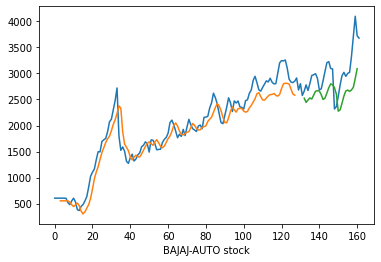

Epoch 1/20
2/2 [==============================] - 4s 631ms/step - loss: 0.0779 - val_loss: 0.0692
Epoch 2/20
2/2 [==============================] - 0s 33ms/step - loss: 0.0216 - val_loss: 0.5761
Epoch 3/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0534 - val_loss: 0.0823
Epoch 4/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0059 - val_loss: 0.0961
Epoch 5/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0262 - val_loss: 0.1011
Epoch 6/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0203 - val_loss: 0.0237
Epoch 7/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0027 - val_loss: 0.1240
Epoch 8/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0104 - val_loss: 0.1989
Epoch 9/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0109 - val_loss: 0.1152
Epoch 10/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0017 - val_loss: 0.0454
Epoch 11/20
2/2 [===========

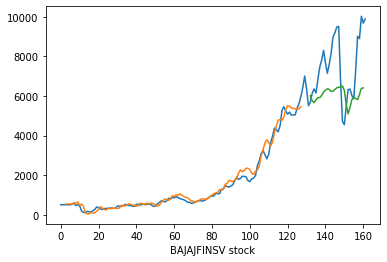

Epoch 1/20
2/2 [==============================] - 4s 566ms/step - loss: 0.1446 - val_loss: 0.0143
Epoch 2/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0462 - val_loss: 0.1125
Epoch 3/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0749 - val_loss: 0.0456
Epoch 4/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0285 - val_loss: 0.0098
Epoch 5/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0178 - val_loss: 0.0245
Epoch 6/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0263 - val_loss: 0.0232
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0240 - val_loss: 0.0118
Epoch 8/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0168 - val_loss: 0.0079
Epoch 9/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0135 - val_loss: 0.0143
Epoch 10/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0127 - val_loss: 0.0233
Epoch 11/20
2/2 [===========

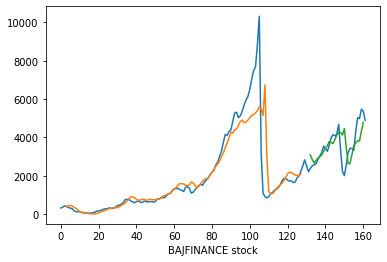

Epoch 1/20
2/2 [==============================] - 4s 705ms/step - loss: 0.1204 - val_loss: 0.0621
Epoch 2/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0715 - val_loss: 0.0533
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0367 - val_loss: 0.0049
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0222 - val_loss: 0.0172
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0292 - val_loss: 0.0195
Epoch 6/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0204 - val_loss: 0.0112
Epoch 7/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0119 - val_loss: 0.0081
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 9/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0121 - val_loss: 0.0096
Epoch 10/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0109 - val_loss: 0.0064
Epoch 11/20
2/2 [===========

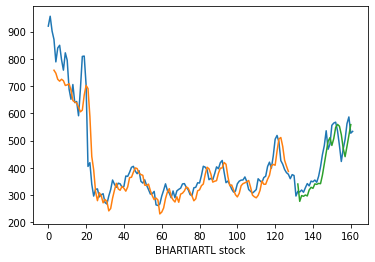

Epoch 1/20
2/2 [==============================] - 6s 995ms/step - loss: 0.5220 - val_loss: 0.0802
Epoch 2/20
2/2 [==============================] - 0s 53ms/step - loss: 0.2048 - val_loss: 0.1707
Epoch 3/20
2/2 [==============================] - 0s 58ms/step - loss: 0.1979 - val_loss: 0.0486
Epoch 4/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0323 - val_loss: 0.0081
Epoch 5/20
2/2 [==============================] - 0s 84ms/step - loss: 0.0297 - val_loss: 0.0161
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0449 - val_loss: 0.0250
Epoch 7/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0437 - val_loss: 0.0242
Epoch 8/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0316 - val_loss: 0.0198
Epoch 9/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0231 - val_loss: 0.0170
Epoch 10/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0213 - val_loss: 0.0171
Epoch 11/20
2/2 [===========

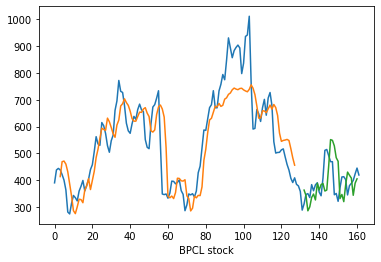

Epoch 1/20
2/2 [==============================] - 4s 657ms/step - loss: 0.1105 - val_loss: 0.0155
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0394 - val_loss: 0.0568
Epoch 3/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0503 - val_loss: 0.0190
Epoch 4/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0260 - val_loss: 0.0091
Epoch 5/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0162 - val_loss: 0.0195
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0181 - val_loss: 0.0239
Epoch 7/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0210 - val_loss: 0.0179
Epoch 8/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0185 - val_loss: 0.0094
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0132 - val_loss: 0.0061
Epoch 10/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0101 - val_loss: 0.0088
Epoch 11/20
2/2 [===========

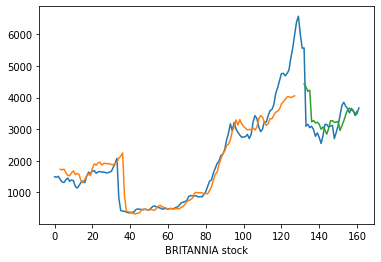

Epoch 1/20
2/2 [==============================] - 4s 589ms/step - loss: 0.1483 - val_loss: 0.0205
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0220 - val_loss: 0.0631
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0645 - val_loss: 0.0538
Epoch 4/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0478 - val_loss: 0.0274
Epoch 5/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0202 - val_loss: 0.0405
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0127 - val_loss: 0.0696
Epoch 7/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0187 - val_loss: 0.0817
Epoch 8/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0209 - val_loss: 0.0713
Epoch 9/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0168 - val_loss: 0.0483
Epoch 10/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0097 - val_loss: 0.0279
Epoch 11/20
2/2 [===========

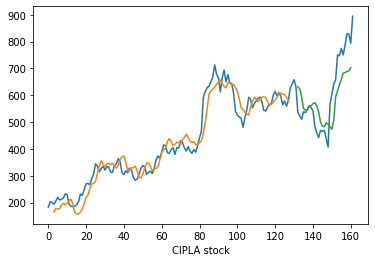

Epoch 1/20
2/2 [==============================] - 5s 728ms/step - loss: 1.2656 - val_loss: 0.1332
Epoch 2/20
2/2 [==============================] - 0s 39ms/step - loss: 0.2509 - val_loss: 0.4535
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.4524 - val_loss: 0.3127
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1052 - val_loss: 0.1193
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0544 - val_loss: 0.0537
Epoch 6/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1732 - val_loss: 0.0513
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1379 - val_loss: 0.0816
Epoch 8/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0424 - val_loss: 0.1431
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0165 - val_loss: 0.2060
Epoch 10/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0385 - val_loss: 0.2391
Epoch 11/20
2/2 [===========

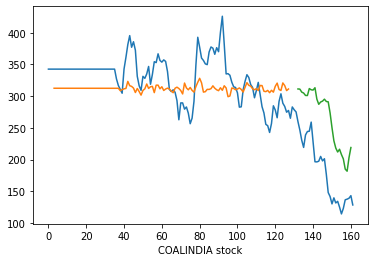

Epoch 1/20
2/2 [==============================] - 4s 674ms/step - loss: 0.1858 - val_loss: 0.1772
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1708 - val_loss: 0.0350
Epoch 3/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0331 - val_loss: 0.2805
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0716 - val_loss: 0.3545
Epoch 5/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0745 - val_loss: 0.1641
Epoch 6/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0178 - val_loss: 0.0225
Epoch 7/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0157 - val_loss: 0.0252
Epoch 8/20
2/2 [==============================] - 0s 68ms/step - loss: 0.0296 - val_loss: 0.0140
Epoch 9/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0116 - val_loss: 0.0213
Epoch 10/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0077 - val_loss: 0.0729
Epoch 11/20
2/2 [===========

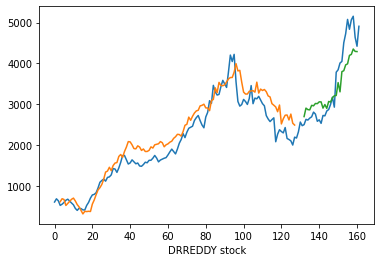

Epoch 1/20
2/2 [==============================] - 4s 644ms/step - loss: 0.2110 - val_loss: 0.2020
Epoch 2/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1012 - val_loss: 0.2180
Epoch 3/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0750 - val_loss: 0.0876
Epoch 4/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0268 - val_loss: 0.0366
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0350 - val_loss: 0.0340
Epoch 6/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0509 - val_loss: 0.0328
Epoch 7/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0458 - val_loss: 0.0405
Epoch 8/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0315 - val_loss: 0.0680
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0238 - val_loss: 0.0953
Epoch 10/20
2/2 [==============================] - 0s 69ms/step - loss: 0.0239 - val_loss: 0.1001
Epoch 11/20
2/2 [===========

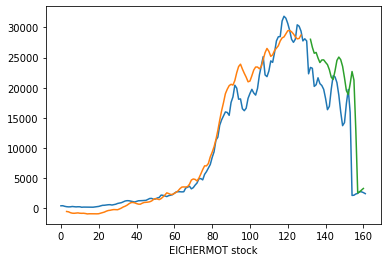

Epoch 1/20
2/2 [==============================] - 5s 612ms/step - loss: 2.0834 - val_loss: 0.1430
Epoch 2/20
2/2 [==============================] - 0s 57ms/step - loss: 0.3078 - val_loss: 0.5734
Epoch 3/20
2/2 [==============================] - 0s 58ms/step - loss: 0.6271 - val_loss: 0.3856
Epoch 4/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1672 - val_loss: 0.1549
Epoch 5/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0994 - val_loss: 0.1271
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2437 - val_loss: 0.1283
Epoch 7/20
2/2 [==============================] - 0s 40ms/step - loss: 0.2178 - val_loss: 0.1348
Epoch 8/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1113 - val_loss: 0.1677
Epoch 9/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0408 - val_loss: 0.2241
Epoch 10/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0355 - val_loss: 0.2769
Epoch 11/20
2/2 [===========

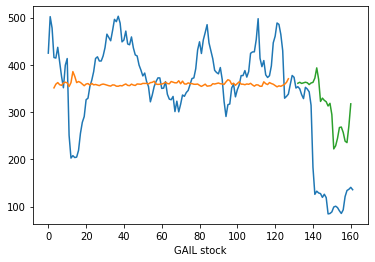

Epoch 1/20
2/2 [==============================] - 4s 646ms/step - loss: 0.3094 - val_loss: 0.0857
Epoch 2/20
2/2 [==============================] - 0s 37ms/step - loss: 0.2322 - val_loss: 0.0181
Epoch 3/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0474 - val_loss: 0.0018
Epoch 4/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1220 - val_loss: 0.0018
Epoch 5/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0690 - val_loss: 0.0047
Epoch 6/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0237 - val_loss: 0.0148
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0465 - val_loss: 0.0156
Epoch 8/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0525 - val_loss: 0.0072
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0275 - val_loss: 0.0027
Epoch 10/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0210 - val_loss: 0.0067
Epoch 11/20
2/2 [===========

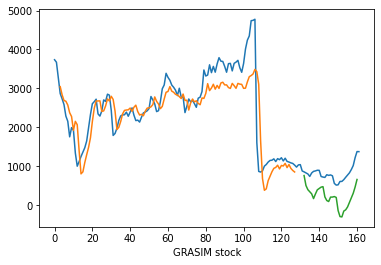

Epoch 1/20
2/2 [==============================] - 4s 681ms/step - loss: 0.0991 - val_loss: 0.1271
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0461 - val_loss: 0.0233
Epoch 3/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0416 - val_loss: 0.0484
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0335 - val_loss: 0.0076
Epoch 5/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0089 - val_loss: 0.0374
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0239 - val_loss: 0.0369
Epoch 7/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0194 - val_loss: 0.0127
Epoch 8/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0094 - val_loss: 0.0062
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0138 - val_loss: 0.0088
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0134 - val_loss: 0.0066
Epoch 11/20
2/2 [===========

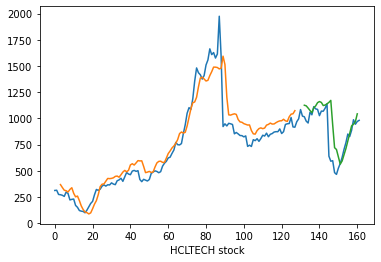

Epoch 1/20
2/2 [==============================] - 5s 1s/step - loss: 0.2116 - val_loss: 0.0569
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0469 - val_loss: 0.2657
Epoch 3/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1667 - val_loss: 0.1381
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0694 - val_loss: 0.0106
Epoch 5/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0263 - val_loss: 0.1075
Epoch 6/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0694 - val_loss: 0.1116
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0548 - val_loss: 0.0299
Epoch 8/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0214 - val_loss: 0.0145
Epoch 9/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0224 - val_loss: 0.0424
Epoch 10/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0360 - val_loss: 0.0414
Epoch 11/20
2/2 [==============

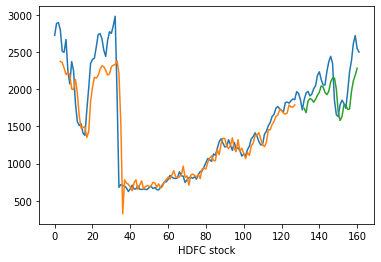

Epoch 1/20
2/2 [==============================] - 5s 680ms/step - loss: 0.2077 - val_loss: 0.1677
Epoch 2/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1625 - val_loss: 0.1045
Epoch 3/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0753 - val_loss: 0.0796
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0491 - val_loss: 0.1297
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0640 - val_loss: 0.0833
Epoch 6/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0399 - val_loss: 0.0373
Epoch 7/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0238 - val_loss: 0.0302
Epoch 8/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0250 - val_loss: 0.0359
Epoch 9/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0290 - val_loss: 0.0397
Epoch 10/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0316 - val_loss: 0.0399
Epoch 11/20
2/2 [===========

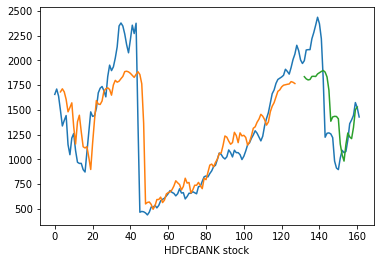

Epoch 1/20
2/2 [==============================] - 4s 600ms/step - loss: 0.3907 - val_loss: 0.5131
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 0.3894 - val_loss: 0.2622
Epoch 3/20
2/2 [==============================] - 0s 39ms/step - loss: 0.1363 - val_loss: 0.0086
Epoch 4/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0313 - val_loss: 0.1541
Epoch 5/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1244 - val_loss: 0.1173
Epoch 6/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0691 - val_loss: 0.0138
Epoch 7/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0144 - val_loss: 0.0284
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0329 - val_loss: 0.0669
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0536 - val_loss: 0.0629
Epoch 10/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0419 - val_loss: 0.0298
Epoch 11/20
2/2 [===========

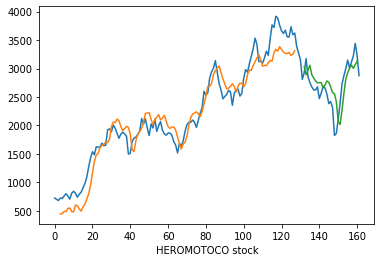

Epoch 1/20
2/2 [==============================] - 4s 706ms/step - loss: 0.0582 - val_loss: 0.0241
Epoch 2/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0418 - val_loss: 0.0329
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0378 - val_loss: 0.0133
Epoch 4/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0124 - val_loss: 0.0315
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0132 - val_loss: 0.0538
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0202 - val_loss: 0.0423
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0132 - val_loss: 0.0207
Epoch 8/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0068 - val_loss: 0.0132
Epoch 9/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0074 - val_loss: 0.0141
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0092 - val_loss: 0.0141
Epoch 11/20
2/2 [===========

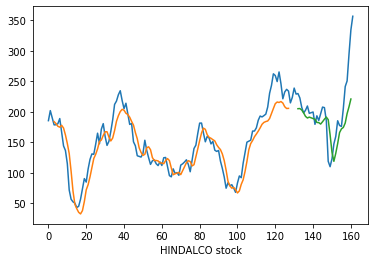

Epoch 1/20
2/2 [==============================] - 4s 669ms/step - loss: 0.0452 - val_loss: 0.0141
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0338 - val_loss: 0.1582
Epoch 3/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0072 - val_loss: 0.3158
Epoch 4/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0148 - val_loss: 0.2019
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0068 - val_loss: 0.0678
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0031 - val_loss: 0.0189
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0071 - val_loss: 0.0128
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0066 - val_loss: 0.0202
Epoch 9/20
2/2 [==============================] - 0s 78ms/step - loss: 0.0033 - val_loss: 0.0389
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0031 - val_loss: 0.0567
Epoch 11/20
2/2 [===========

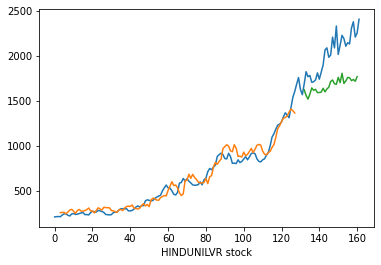

Epoch 1/20
2/2 [==============================] - 4s 640ms/step - loss: 0.0824 - val_loss: 0.0262
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0579 - val_loss: 0.0056
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0470 - val_loss: 0.0077
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0408 - val_loss: 0.0058
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0287 - val_loss: 0.0130
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0379 - val_loss: 0.0073
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0215 - val_loss: 0.0036
Epoch 8/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0235 - val_loss: 0.0040
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0251 - val_loss: 0.0032
Epoch 10/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0168 - val_loss: 0.0053
Epoch 11/20
2/2 [===========

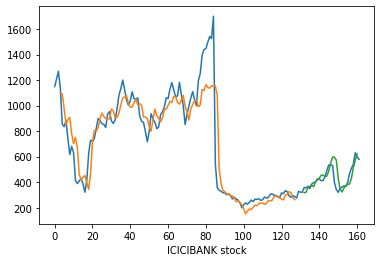

Epoch 1/20
2/2 [==============================] - 4s 589ms/step - loss: 0.0264 - val_loss: 0.0161
Epoch 2/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0059 - val_loss: 0.0344
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0077 - val_loss: 0.0200
Epoch 4/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0035 - val_loss: 0.0186
Epoch 5/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0074 - val_loss: 0.0151
Epoch 6/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0038 - val_loss: 0.0207
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0037 - val_loss: 0.0245
Epoch 8/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0031 - val_loss: 0.0167
Epoch 9/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0018 - val_loss: 0.0136
Epoch 10/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0027 - val_loss: 0.0140
Epoch 11/20
2/2 [===========

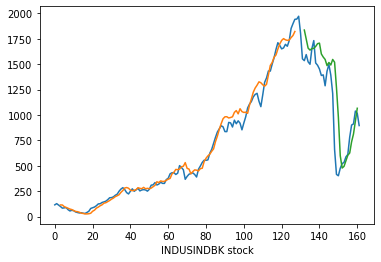

Epoch 1/20
2/2 [==============================] - 5s 692ms/step - loss: 0.1893 - val_loss: 0.0058
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0465 - val_loss: 0.0218
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1556 - val_loss: 0.0179
Epoch 4/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0845 - val_loss: 0.0048
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0136 - val_loss: 0.0099
Epoch 6/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0389 - val_loss: 0.0179
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0531 - val_loss: 0.0150
Epoch 8/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0285 - val_loss: 0.0087
Epoch 9/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0125 - val_loss: 0.0063
Epoch 10/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0171 - val_loss: 0.0065
Epoch 11/20
2/2 [===========

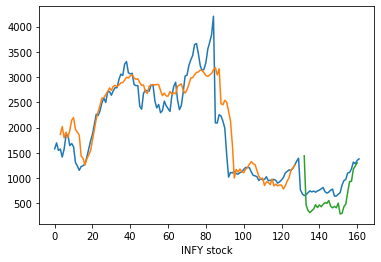

Epoch 1/20
2/2 [==============================] - 4s 669ms/step - loss: 0.3893 - val_loss: 0.0472
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1260 - val_loss: 0.1145
Epoch 3/20
2/2 [==============================] - 0s 63ms/step - loss: 0.2346 - val_loss: 0.1058
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1896 - val_loss: 0.0644
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0859 - val_loss: 0.0253
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0203 - val_loss: 0.0056
Epoch 7/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0492 - val_loss: 0.0013
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0774 - val_loss: 0.0013
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0521 - val_loss: 0.0033
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0189 - val_loss: 0.0081
Epoch 11/20
2/2 [===========

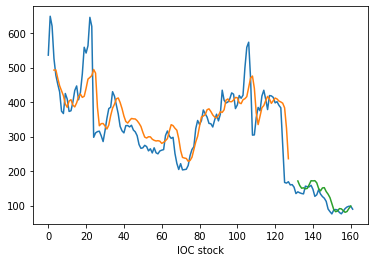

Epoch 1/20
2/2 [==============================] - 4s 662ms/step - loss: 0.1367 - val_loss: 0.1516
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0980 - val_loss: 0.1411
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0713 - val_loss: 0.0545
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0485 - val_loss: 0.0315
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0593 - val_loss: 0.0260
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0473 - val_loss: 0.0266
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0271 - val_loss: 0.0402
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0248 - val_loss: 0.0521
Epoch 9/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0281 - val_loss: 0.0494
Epoch 10/20
2/2 [==============================] - 0s 67ms/step - loss: 0.0255 - val_loss: 0.0370
Epoch 11/20
2/2 [===========

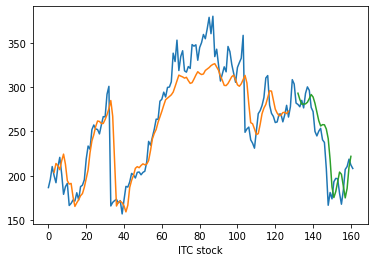

Epoch 1/20
2/2 [==============================] - 5s 635ms/step - loss: 0.2030 - val_loss: 0.0608
Epoch 2/20
2/2 [==============================] - 0s 55ms/step - loss: 0.1674 - val_loss: 0.0055
Epoch 3/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0400 - val_loss: 0.0028
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1053 - val_loss: 7.9985e-04
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0326 - val_loss: 0.0085
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0366 - val_loss: 0.0143
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0500 - val_loss: 0.0075
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0213 - val_loss: 0.0013
Epoch 9/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0238 - val_loss: 0.0013
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0341 - val_loss: 0.0012
Epoch 11/20
2/2 [=======

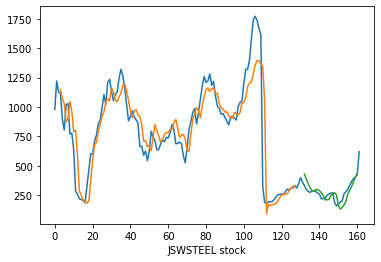

Epoch 1/20
2/2 [==============================] - 6s 1s/step - loss: 0.0829 - val_loss: 0.0103
Epoch 2/20
2/2 [==============================] - 0s 75ms/step - loss: 0.0294 - val_loss: 0.3464
Epoch 3/20
2/2 [==============================] - 0s 97ms/step - loss: 0.0656 - val_loss: 0.0859
Epoch 4/20
2/2 [==============================] - 0s 87ms/step - loss: 0.0066 - val_loss: 0.0104
Epoch 5/20
2/2 [==============================] - 0s 80ms/step - loss: 0.0283 - val_loss: 0.0130
Epoch 6/20
2/2 [==============================] - 0s 87ms/step - loss: 0.0262 - val_loss: 0.0208
Epoch 7/20
2/2 [==============================] - 0s 82ms/step - loss: 0.0066 - val_loss: 0.0924
Epoch 8/20
2/2 [==============================] - 0s 75ms/step - loss: 0.0128 - val_loss: 0.1382
Epoch 9/20
2/2 [==============================] - 0s 79ms/step - loss: 0.0173 - val_loss: 0.0955
Epoch 10/20
2/2 [==============================] - 0s 76ms/step - loss: 0.0072 - val_loss: 0.0409
Epoch 11/20
2/2 [==============

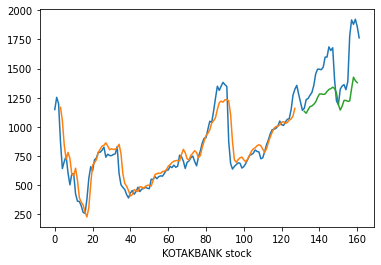

Epoch 1/20
2/2 [==============================] - 6s 685ms/step - loss: 0.3121 - val_loss: 0.0394
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0837 - val_loss: 0.1609
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1488 - val_loss: 0.0989
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0693 - val_loss: 0.0176
Epoch 5/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0168 - val_loss: 0.0041
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0369 - val_loss: 0.0144
Epoch 7/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0427 - val_loss: 0.0063
Epoch 8/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0184 - val_loss: 0.0018
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0071 - val_loss: 0.0105
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0172 - val_loss: 0.0153
Epoch 11/20
2/2 [===========

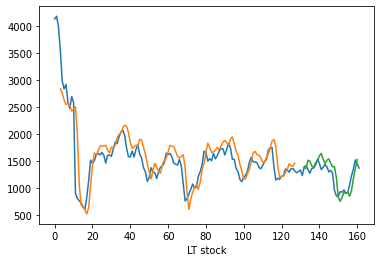

Epoch 1/20
2/2 [==============================] - 5s 624ms/step - loss: 0.0995 - val_loss: 0.0275
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1039 - val_loss: 0.0722
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0684 - val_loss: 0.0083
Epoch 4/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0593 - val_loss: 0.0263
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0527 - val_loss: 0.0070
Epoch 6/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0194 - val_loss: 0.0320
Epoch 7/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0467 - val_loss: 0.0169
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0195 - val_loss: 0.0072
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0209 - val_loss: 0.0153
Epoch 10/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0260 - val_loss: 0.0051
Epoch 11/20
2/2 [===========

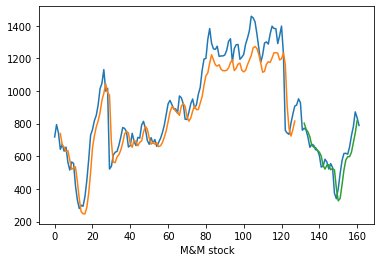

Epoch 1/20
2/2 [==============================] - 4s 600ms/step - loss: 0.0623 - val_loss: 0.0686
Epoch 2/20
2/2 [==============================] - 0s 73ms/step - loss: 0.0498 - val_loss: 0.0366
Epoch 3/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0202 - val_loss: 0.0101
Epoch 4/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0081 - val_loss: 0.0414
Epoch 5/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0183 - val_loss: 0.0107
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0091 - val_loss: 0.0165
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0080 - val_loss: 0.0442
Epoch 8/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0111 - val_loss: 0.0391
Epoch 9/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0080 - val_loss: 0.0146
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0032 - val_loss: 0.0059
Epoch 11/20
2/2 [===========

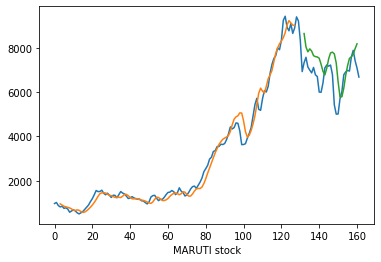

Epoch 1/20
2/2 [==============================] - 4s 692ms/step - loss: 0.0401 - val_loss: 0.0257
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0229 - val_loss: 0.1777
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0130 - val_loss: 0.2612
Epoch 4/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0124 - val_loss: 0.0224
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0034 - val_loss: 0.0108
Epoch 6/20
2/2 [==============================] - 0s 67ms/step - loss: 0.0111 - val_loss: 0.0069
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0034 - val_loss: 0.0503
Epoch 8/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0031 - val_loss: 0.1154
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0058 - val_loss: 0.0834
Epoch 10/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0014 - val_loss: 0.0327
Epoch 11/20
2/2 [===========

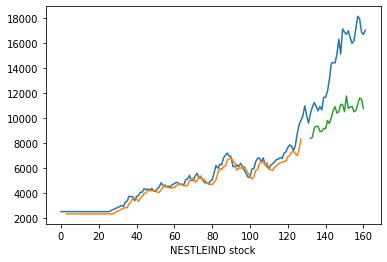

Epoch 1/20
2/2 [==============================] - 5s 685ms/step - loss: 0.2140 - val_loss: 0.0051
Epoch 2/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0483 - val_loss: 0.1263
Epoch 3/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1711 - val_loss: 0.1013
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0746 - val_loss: 0.0172
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0200 - val_loss: 0.0039
Epoch 6/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0710 - val_loss: 0.0054
Epoch 7/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0690 - val_loss: 0.0040
Epoch 8/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0280 - val_loss: 0.0200
Epoch 9/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0158 - val_loss: 0.0504
Epoch 10/20
2/2 [==============================] - 0s 73ms/step - loss: 0.0321 - val_loss: 0.0615
Epoch 11/20
2/2 [===========

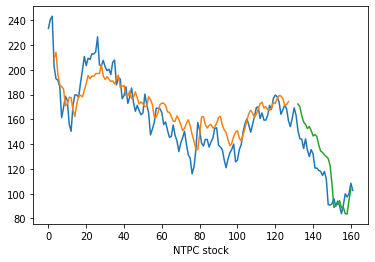

Epoch 1/20
2/2 [==============================] - 4s 664ms/step - loss: 0.2185 - val_loss: 0.0046
Epoch 2/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0281 - val_loss: 0.0197
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0355 - val_loss: 0.0276
Epoch 4/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0455 - val_loss: 0.0248
Epoch 5/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0444 - val_loss: 0.0168
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0371 - val_loss: 0.0086
Epoch 7/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0288 - val_loss: 0.0032
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0231 - val_loss: 0.0011
Epoch 9/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0206 - val_loss: 0.0017
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0189 - val_loss: 0.0039
Epoch 11/20
2/2 [===========

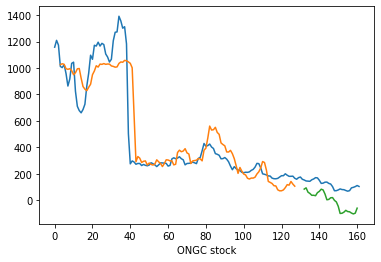

Epoch 1/20
2/2 [==============================] - 4s 625ms/step - loss: 0.2739 - val_loss: 0.0205
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1061 - val_loss: 0.0558
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1479 - val_loss: 0.0165
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0953 - val_loss: 0.0118
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0443 - val_loss: 0.0305
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0197 - val_loss: 0.0627
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0247 - val_loss: 0.0880
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0351 - val_loss: 0.0793
Epoch 9/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0315 - val_loss: 0.0570
Epoch 10/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0217 - val_loss: 0.0405
Epoch 11/20
2/2 [===========

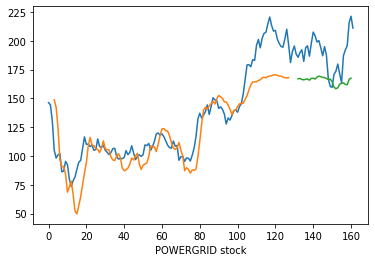

Epoch 1/20
2/2 [==============================] - 6s 712ms/step - loss: 0.1032 - val_loss: 0.0221
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0274 - val_loss: 0.1569
Epoch 3/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0643 - val_loss: 0.0549
Epoch 4/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0187 - val_loss: 0.0222
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0280 - val_loss: 0.0347
Epoch 6/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0266 - val_loss: 0.0100
Epoch 7/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0099 - val_loss: 0.0255
Epoch 8/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0177 - val_loss: 0.0372
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0181 - val_loss: 0.0170
Epoch 10/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0099 - val_loss: 0.0085
Epoch 11/20
2/2 [===========

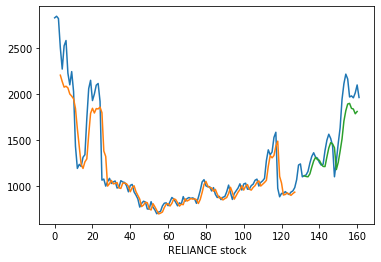

Epoch 1/20
2/2 [==============================] - 4s 626ms/step - loss: 0.1272 - val_loss: 0.0054
Epoch 2/20
2/2 [==============================] - 0s 68ms/step - loss: 0.0393 - val_loss: 0.0052
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0962 - val_loss: 0.0027
Epoch 4/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0278 - val_loss: 0.0012
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0281 - val_loss: 0.0038
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0442 - val_loss: 0.0027
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0307 - val_loss: 0.0011
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0174 - val_loss: 0.0029
Epoch 9/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0203 - val_loss: 0.0050
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0254 - val_loss: 0.0040
Epoch 11/20
2/2 [===========

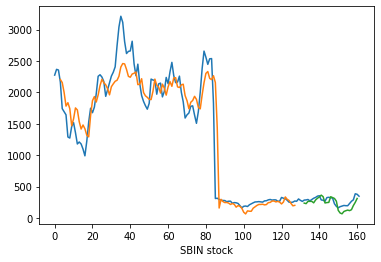

Epoch 1/20
2/2 [==============================] - 4s 632ms/step - loss: 0.1681 - val_loss: 0.0130
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0931 - val_loss: 0.0221
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0633 - val_loss: 0.1161
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0225 - val_loss: 0.3126
Epoch 5/20
2/2 [==============================] - 0s 71ms/step - loss: 0.0307 - val_loss: 0.2441
Epoch 6/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0251 - val_loss: 0.0831
Epoch 7/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0120 - val_loss: 0.0160
Epoch 8/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0129 - val_loss: 0.0099
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0158 - val_loss: 0.0106
Epoch 10/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0145 - val_loss: 0.0090
Epoch 11/20
2/2 [===========

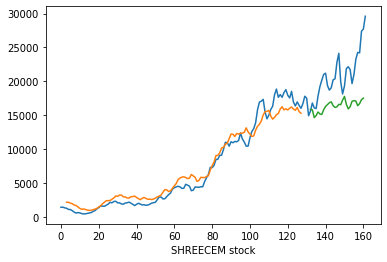

Epoch 1/20
2/2 [==============================] - 4s 622ms/step - loss: 0.2914 - val_loss: 0.1008
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2069 - val_loss: 0.0749
Epoch 3/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0701 - val_loss: 0.0125
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0341 - val_loss: 0.0017
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0530 - val_loss: 0.0058
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0495 - val_loss: 0.0058
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0339 - val_loss: 0.0035
Epoch 8/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0232 - val_loss: 0.0027
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0200 - val_loss: 0.0037
Epoch 10/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0215 - val_loss: 0.0054
Epoch 11/20
2/2 [===========

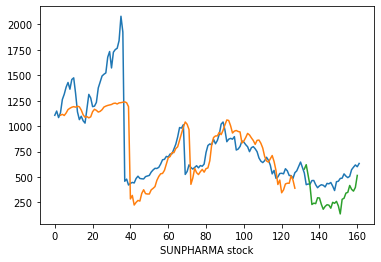

Epoch 1/20
2/2 [==============================] - 4s 658ms/step - loss: 0.1578 - val_loss: 0.0452
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1359 - val_loss: 0.0332
Epoch 3/20
2/2 [==============================] - 0s 70ms/step - loss: 0.0695 - val_loss: 0.0043
Epoch 4/20
2/2 [==============================] - 0s 79ms/step - loss: 0.0166 - val_loss: 0.0049
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0485 - val_loss: 0.0082
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0469 - val_loss: 0.0044
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0200 - val_loss: 0.0024
Epoch 8/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0156 - val_loss: 0.0041
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0247 - val_loss: 0.0047
Epoch 10/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0273 - val_loss: 0.0033
Epoch 11/20
2/2 [===========

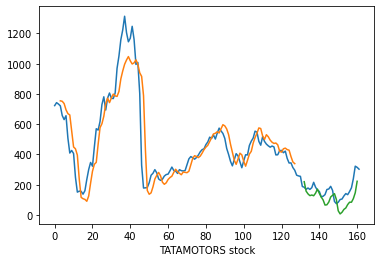

Epoch 1/20
2/2 [==============================] - 4s 625ms/step - loss: 0.3361 - val_loss: 0.0766
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0721 - val_loss: 0.2768
Epoch 3/20
2/2 [==============================] - 0s 63ms/step - loss: 0.2466 - val_loss: 0.1470
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0926 - val_loss: 0.0292
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0346 - val_loss: 0.0785
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0889 - val_loss: 0.0746
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0632 - val_loss: 0.0340
Epoch 8/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0263 - val_loss: 0.0387
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0359 - val_loss: 0.0618
Epoch 10/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0503 - val_loss: 0.0577
Epoch 11/20
2/2 [===========

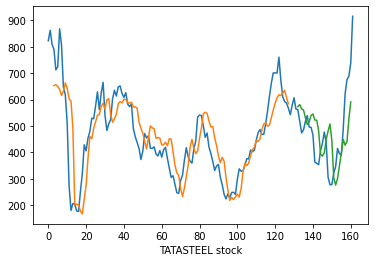

Epoch 1/20
2/2 [==============================] - 5s 618ms/step - loss: 0.2439 - val_loss: 0.0588
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0878 - val_loss: 0.1510
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1311 - val_loss: 0.0820
Epoch 4/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0737 - val_loss: 0.0173
Epoch 5/20
2/2 [==============================] - 0s 70ms/step - loss: 0.0348 - val_loss: 0.0321
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0371 - val_loss: 0.0552
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0417 - val_loss: 0.0539
Epoch 8/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0358 - val_loss: 0.0406
Epoch 9/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0262 - val_loss: 0.0279
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0191 - val_loss: 0.0198
Epoch 11/20
2/2 [===========

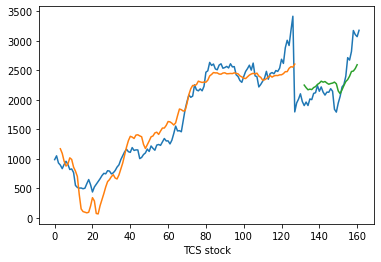

Epoch 1/20
2/2 [==============================] - 4s 618ms/step - loss: 0.1129 - val_loss: 0.1075
Epoch 2/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1249 - val_loss: 0.0605
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0420 - val_loss: 0.0021
Epoch 4/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0276 - val_loss: 0.0319
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0508 - val_loss: 0.0187
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0222 - val_loss: 0.0020
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0128 - val_loss: 0.0098
Epoch 8/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0252 - val_loss: 0.0130
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0230 - val_loss: 0.0044
Epoch 10/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0116 - val_loss: 0.0024
Epoch 11/20
2/2 [===========

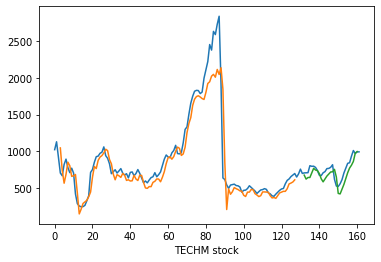

Epoch 1/20
2/2 [==============================] - 4s 681ms/step - loss: 0.0402 - val_loss: 0.0361
Epoch 2/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0234 - val_loss: 0.0046
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0254 - val_loss: 0.0017
Epoch 4/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0130 - val_loss: 0.0143
Epoch 5/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0149 - val_loss: 0.0217
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0161 - val_loss: 0.0062
Epoch 7/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0127 - val_loss: 0.0013
Epoch 8/20
2/2 [==============================] - 0s 67ms/step - loss: 0.0128 - val_loss: 0.0011
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0105 - val_loss: 0.0055
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0105 - val_loss: 0.0114
Epoch 11/20
2/2 [===========

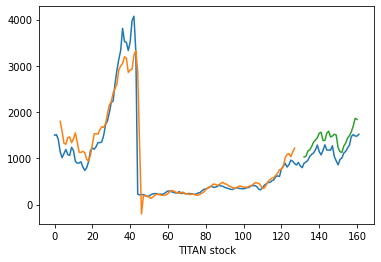

Epoch 1/20
2/2 [==============================] - 5s 714ms/step - loss: 0.3663 - val_loss: 0.1533
Epoch 2/20
2/2 [==============================] - 0s 70ms/step - loss: 0.0297 - val_loss: 0.0224
Epoch 3/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0707 - val_loss: 0.0347
Epoch 4/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0859 - val_loss: 0.0183
Epoch 5/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0584 - val_loss: 0.0204
Epoch 6/20
2/2 [==============================] - 0s 73ms/step - loss: 0.0287 - val_loss: 0.0524
Epoch 7/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0161 - val_loss: 0.0973
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0169 - val_loss: 0.1309
Epoch 9/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0207 - val_loss: 0.1378
Epoch 10/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0211 - val_loss: 0.1220
Epoch 11/20
2/2 [===========

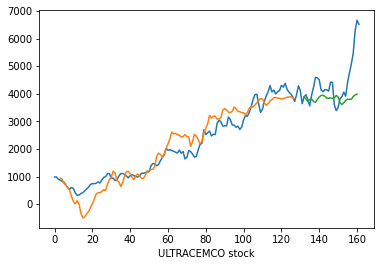

Epoch 1/20
2/2 [==============================] - 4s 677ms/step - loss: 0.1236 - val_loss: 0.0771
Epoch 2/20
2/2 [==============================] - 0s 71ms/step - loss: 0.0987 - val_loss: 0.0806
Epoch 3/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0651 - val_loss: 0.0043
Epoch 4/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0222 - val_loss: 0.0172
Epoch 5/20
2/2 [==============================] - 0s 73ms/step - loss: 0.0391 - val_loss: 0.0285
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0408 - val_loss: 0.0091
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0204 - val_loss: 1.1981e-04
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0160 - val_loss: 0.0085
Epoch 9/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0226 - val_loss: 0.0142
Epoch 10/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0243 - val_loss: 0.0087
Epoch 11/20
2/2 [=======

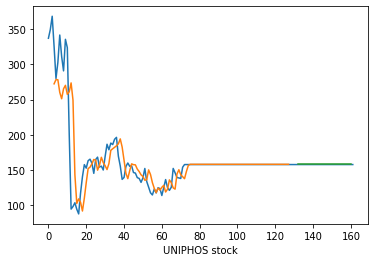

Epoch 1/20
2/2 [==============================] - 4s 603ms/step - loss: 0.0742 - val_loss: 0.0637
Epoch 2/20
2/2 [==============================] - 0s 73ms/step - loss: 0.0247 - val_loss: 0.1648
Epoch 3/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0508 - val_loss: 0.0278
Epoch 4/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0074 - val_loss: 0.0833
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0264 - val_loss: 0.0786
Epoch 6/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0166 - val_loss: 0.0242
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0052 - val_loss: 0.0436
Epoch 8/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0154 - val_loss: 0.0450
Epoch 9/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0107 - val_loss: 0.0202
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0032 - val_loss: 0.0342
Epoch 11/20
2/2 [===========

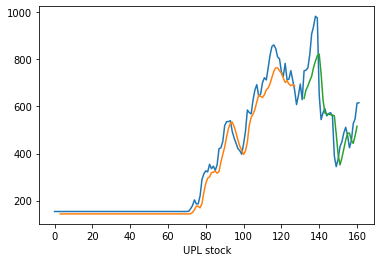

Epoch 1/20
2/2 [==============================] - 6s 919ms/step - loss: 0.0272 - val_loss: 0.0087
Epoch 2/20
2/2 [==============================] - 0s 70ms/step - loss: 0.0214 - val_loss: 0.0024
Epoch 3/20
2/2 [==============================] - 0s 79ms/step - loss: 0.0129 - val_loss: 0.0108
Epoch 4/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0161 - val_loss: 0.0046
Epoch 5/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0092 - val_loss: 3.6895e-04
Epoch 6/20
2/2 [==============================] - 0s 140ms/step - loss: 0.0090 - val_loss: 9.6467e-04
Epoch 7/20
2/2 [==============================] - 0s 72ms/step - loss: 0.0106 - val_loss: 6.1998e-04
Epoch 8/20
2/2 [==============================] - 0s 134ms/step - loss: 0.0075 - val_loss: 2.5087e-04
Epoch 9/20
2/2 [==============================] - 0s 95ms/step - loss: 0.0060 - val_loss: 0.0011
Epoch 10/20
2/2 [==============================] - 0s 94ms/step - loss: 0.0065 - val_loss: 0.0012
Epoch 11/2

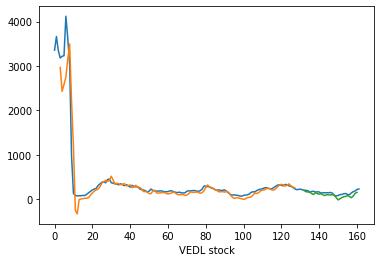

Epoch 1/20
2/2 [==============================] - 4s 626ms/step - loss: 1.0211 - val_loss: 0.0480
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1452 - val_loss: 0.2694
Epoch 3/20
2/2 [==============================] - 0s 50ms/step - loss: 0.3613 - val_loss: 0.2562
Epoch 4/20
2/2 [==============================] - 0s 63ms/step - loss: 0.1882 - val_loss: 0.1399
Epoch 5/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0620 - val_loss: 0.0595
Epoch 6/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1010 - val_loss: 0.0335
Epoch 7/20
2/2 [==============================] - 0s 61ms/step - loss: 0.1390 - val_loss: 0.0304
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1174 - val_loss: 0.0389
Epoch 9/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0678 - val_loss: 0.0584
Epoch 10/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0420 - val_loss: 0.0814
Epoch 11/20
2/2 [===========

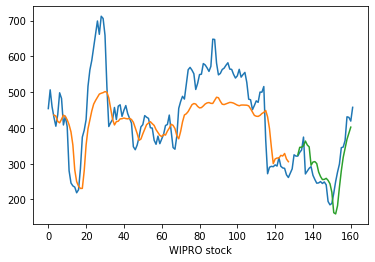

Epoch 1/20
2/2 [==============================] - 4s 638ms/step - loss: 0.1563 - val_loss: 0.0177
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0638 - val_loss: 0.2624
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1350 - val_loss: 0.1138
Epoch 4/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0296 - val_loss: 0.0124
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0424 - val_loss: 0.0352
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0636 - val_loss: 0.0132
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0214 - val_loss: 0.0263
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0146 - val_loss: 0.0693
Epoch 9/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0313 - val_loss: 0.0675
Epoch 10/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0242 - val_loss: 0.0304
Epoch 11/20
2/2 [===========

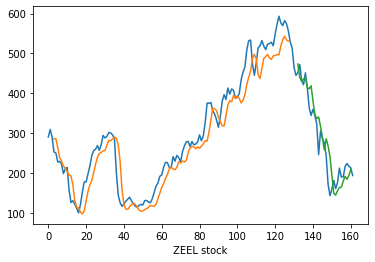

In [ ]:
# RNN are sensitive to the scale of the daya,so we apply MinMax scaler
for i in stocks_dfm.columns:
    scaler=MinMaxScaler(feature_range=(0,1))
    df1=scaler.fit_transform(np.array(stocks_dfm[i]).reshape(-1,1))


    train_data,test_data=df1[0:129],df1[129:len(stocks_dfm)]
    
    time_step = 3
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)

    ### Creating the Stacked RNN model
    model=Sequential()
    model.add(SimpleRNN(100,return_sequences=True,input_shape=(3,1)))
    model.add(SimpleRNN(50,return_sequences=True))
    model.add(SimpleRNN(25,return_sequences=True))
    model.add(SimpleRNN(5))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')   
    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)
    ### Prediction
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)


    ###Transformback to original form
    train_predict=scaler.inverse_transform(train_predict)
    test_predict=scaler.inverse_transform(test_predict)

    ###Calculating perfomance metrics
    mae = metrics.mean_absolute_error(ytest,test_predict)
    mse = metrics.mean_squared_error(ytest,test_predict)
    rmse = np.sqrt(mse) #mse**(0.5)  

    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("RMSE:", rmse)


  
    look_back=3
    trainPredictPlot = numpy.empty_like(df1)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    testPredictPlot = numpy.empty_like(df1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
    plt.plot(scaler.inverse_transform(df1))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.xlabel(i+' stock')
    plt.show()
    

#LSTM

Epoch 1/20
2/2 [==============================] - 13s 3s/step - loss: 0.0745 - val_loss: 0.0804
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0712 - val_loss: 0.0760
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0680 - val_loss: 0.0716
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0646 - val_loss: 0.0671
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0615 - val_loss: 0.0625
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0582 - val_loss: 0.0578
Epoch 7/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0548 - val_loss: 0.0530
Epoch 8/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0517 - val_loss: 0.0480
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0481 - val_loss: 0.0429
Epoch 10/20
2/2 [==============================] - 0s 75ms/step - loss: 0.0445 - val_loss: 0.0378
Epoch 11/20
2/2 [=============

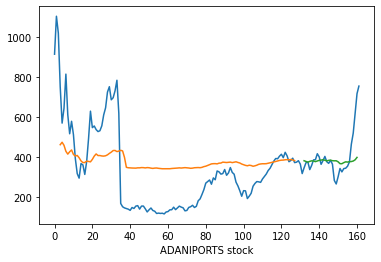

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1638 - val_loss: 0.0962
Epoch 2/20
2/2 [==============================] - 0s 58ms/step - loss: 0.1592 - val_loss: 0.0914
Epoch 3/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1543 - val_loss: 0.0865
Epoch 4/20
2/2 [==============================] - 0s 57ms/step - loss: 0.1494 - val_loss: 0.0815
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1442 - val_loss: 0.0763
Epoch 6/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1388 - val_loss: 0.0709
Epoch 7/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1330 - val_loss: 0.0652
Epoch 8/20
2/2 [==============================] - 0s 40ms/step - loss: 0.1267 - val_loss: 0.0593
Epoch 9/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1207 - val_loss: 0.0531
Epoch 10/20
2/2 [==============================] - 0s 79ms/step - loss: 0.1139 - val_loss: 0.0466
Epoch 11/20
2/2 [=============

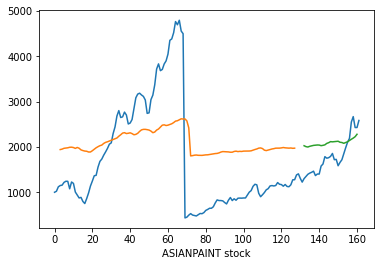

Epoch 1/20
2/2 [==============================] - 15s 2s/step - loss: 0.1720 - val_loss: 0.0369
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1669 - val_loss: 0.0342
Epoch 3/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1617 - val_loss: 0.0316
Epoch 4/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1564 - val_loss: 0.0289
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1507 - val_loss: 0.0263
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1447 - val_loss: 0.0236
Epoch 7/20
2/2 [==============================] - 0s 58ms/step - loss: 0.1387 - val_loss: 0.0210
Epoch 8/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1325 - val_loss: 0.0183
Epoch 9/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1257 - val_loss: 0.0157
Epoch 10/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1182 - val_loss: 0.0132
Epoch 11/20
2/2 [=============

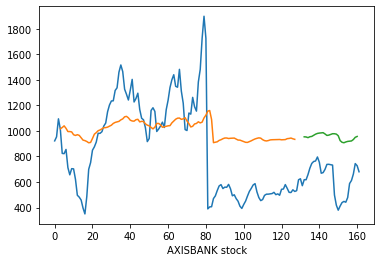

Epoch 1/20
2/2 [==============================] - 13s 3s/step - loss: 0.2117 - val_loss: 0.4864
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 0.2031 - val_loss: 0.4714
Epoch 3/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1943 - val_loss: 0.4558
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1854 - val_loss: 0.4394
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1764 - val_loss: 0.4220
Epoch 6/20
2/2 [==============================] - 0s 61ms/step - loss: 0.1662 - val_loss: 0.4036
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1563 - val_loss: 0.3836
Epoch 8/20
2/2 [==============================] - 0s 62ms/step - loss: 0.1456 - val_loss: 0.3619
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1344 - val_loss: 0.3382
Epoch 10/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1223 - val_loss: 0.3120
Epoch 11/20
2/2 [=============

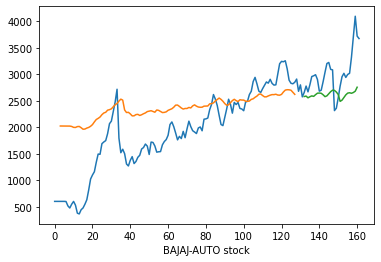

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.0418 - val_loss: 0.5468
Epoch 2/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0400 - val_loss: 0.5353
Epoch 3/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0380 - val_loss: 0.5233
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0362 - val_loss: 0.5108
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0343 - val_loss: 0.4975
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0324 - val_loss: 0.4836
Epoch 7/20
2/2 [==============================] - 0s 68ms/step - loss: 0.0308 - val_loss: 0.4685
Epoch 8/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0291 - val_loss: 0.4524
Epoch 9/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0275 - val_loss: 0.4349
Epoch 10/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0259 - val_loss: 0.4162
Epoch 11/20
2/2 [=============

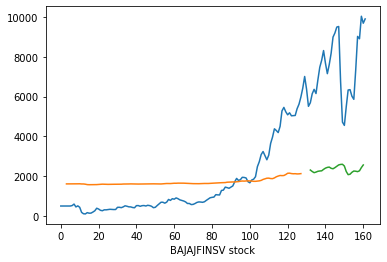

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.0665 - val_loss: 0.1178
Epoch 2/20
2/2 [==============================] - 0s 73ms/step - loss: 0.0634 - val_loss: 0.1118
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0608 - val_loss: 0.1058
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0578 - val_loss: 0.0996
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0552 - val_loss: 0.0932
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0523 - val_loss: 0.0866
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0498 - val_loss: 0.0798
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0469 - val_loss: 0.0729
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0442 - val_loss: 0.0657
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0419 - val_loss: 0.0583
Epoch 11/20
2/2 [=============

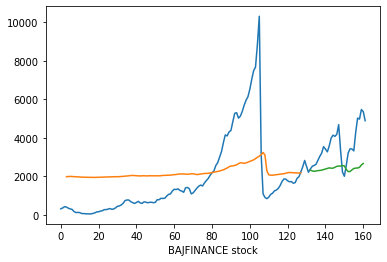

Epoch 1/20
2/2 [==============================] - 13s 3s/step - loss: 0.0896 - val_loss: 0.0768
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0863 - val_loss: 0.0728
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0825 - val_loss: 0.0688
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0793 - val_loss: 0.0647
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0759 - val_loss: 0.0605
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0724 - val_loss: 0.0562
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0685 - val_loss: 0.0518
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0652 - val_loss: 0.0473
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0612 - val_loss: 0.0428
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0576 - val_loss: 0.0382
Epoch 11/20
2/2 [=============

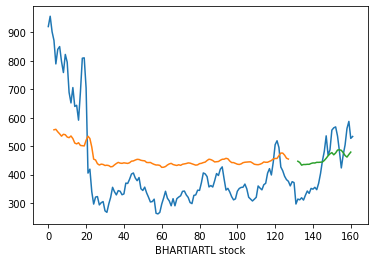

Epoch 1/20
2/2 [==============================] - 13s 3s/step - loss: 0.2109 - val_loss: 0.0289
Epoch 2/20
2/2 [==============================] - 0s 65ms/step - loss: 0.2034 - val_loss: 0.0261
Epoch 3/20
2/2 [==============================] - 0s 66ms/step - loss: 0.1959 - val_loss: 0.0234
Epoch 4/20
2/2 [==============================] - 0s 62ms/step - loss: 0.1885 - val_loss: 0.0207
Epoch 5/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1808 - val_loss: 0.0182
Epoch 6/20
2/2 [==============================] - 0s 58ms/step - loss: 0.1724 - val_loss: 0.0156
Epoch 7/20
2/2 [==============================] - 0s 84ms/step - loss: 0.1641 - val_loss: 0.0133
Epoch 8/20
2/2 [==============================] - 0s 83ms/step - loss: 0.1552 - val_loss: 0.0110
Epoch 9/20
2/2 [==============================] - 0s 67ms/step - loss: 0.1460 - val_loss: 0.0090
Epoch 10/20
2/2 [==============================] - 0s 63ms/step - loss: 0.1361 - val_loss: 0.0073
Epoch 11/20
2/2 [=============

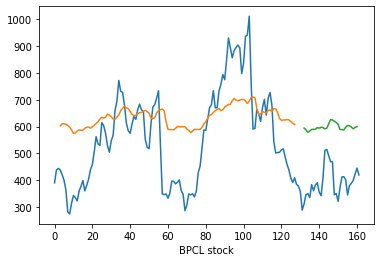

Epoch 1/20
2/2 [==============================] - 17s 3s/step - loss: 0.1013 - val_loss: 0.2215
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0974 - val_loss: 0.2133
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0934 - val_loss: 0.2049
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0894 - val_loss: 0.1962
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0853 - val_loss: 0.1871
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0815 - val_loss: 0.1776
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0771 - val_loss: 0.1676
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0731 - val_loss: 0.1570
Epoch 9/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0688 - val_loss: 0.1457
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0643 - val_loss: 0.1337
Epoch 11/20
2/2 [=============

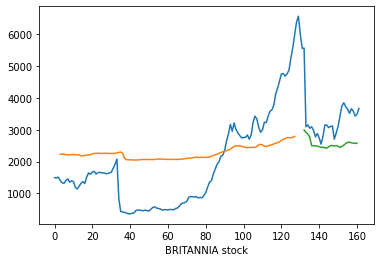

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1540 - val_loss: 0.3551
Epoch 2/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1478 - val_loss: 0.3441
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1417 - val_loss: 0.3327
Epoch 4/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1354 - val_loss: 0.3207
Epoch 5/20
2/2 [==============================] - 0s 69ms/step - loss: 0.1286 - val_loss: 0.3081
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1221 - val_loss: 0.2945
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1149 - val_loss: 0.2800
Epoch 8/20
2/2 [==============================] - 0s 60ms/step - loss: 0.1071 - val_loss: 0.2643
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0989 - val_loss: 0.2472
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0909 - val_loss: 0.2284
Epoch 11/20
2/2 [=============

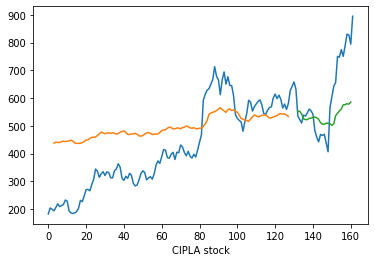

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.4824 - val_loss: 0.0668
Epoch 2/20
2/2 [==============================] - 0s 53ms/step - loss: 0.4684 - val_loss: 0.0626
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.4539 - val_loss: 0.0585
Epoch 4/20
2/2 [==============================] - 0s 66ms/step - loss: 0.4389 - val_loss: 0.0543
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.4231 - val_loss: 0.0501
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.4063 - val_loss: 0.0458
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.3881 - val_loss: 0.0414
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.3680 - val_loss: 0.0371
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.3462 - val_loss: 0.0328
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.3219 - val_loss: 0.0287
Epoch 11/20
2/2 [=============

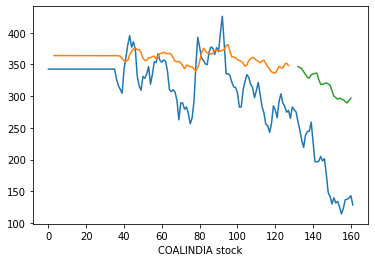

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1563 - val_loss: 0.4415
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1489 - val_loss: 0.4264
Epoch 3/20
2/2 [==============================] - 0s 62ms/step - loss: 0.1412 - val_loss: 0.4107
Epoch 4/20
2/2 [==============================] - 0s 64ms/step - loss: 0.1333 - val_loss: 0.3941
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1249 - val_loss: 0.3764
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1167 - val_loss: 0.3574
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1081 - val_loss: 0.3368
Epoch 8/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0983 - val_loss: 0.3145
Epoch 9/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0892 - val_loss: 0.2900
Epoch 10/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0786 - val_loss: 0.2631
Epoch 11/20
2/2 [=============

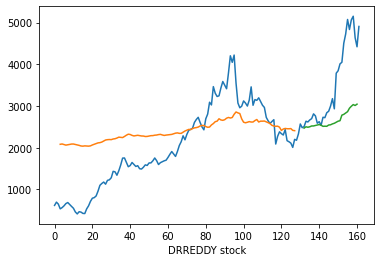

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1922 - val_loss: 0.2717
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1875 - val_loss: 0.2643
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1829 - val_loss: 0.2566
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1782 - val_loss: 0.2487
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1736 - val_loss: 0.2402
Epoch 6/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1685 - val_loss: 0.2312
Epoch 7/20
2/2 [==============================] - 0s 55ms/step - loss: 0.1633 - val_loss: 0.2216
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1576 - val_loss: 0.2111
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1519 - val_loss: 0.1996
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1450 - val_loss: 0.1869
Epoch 11/20
2/2 [=============

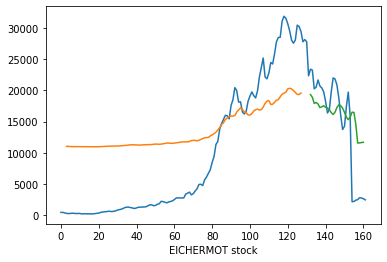

Epoch 1/20
2/2 [==============================] - 14s 3s/step - loss: 0.5291 - val_loss: 0.1063
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.5163 - val_loss: 0.1025
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.5030 - val_loss: 0.0986
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.4892 - val_loss: 0.0946
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.4741 - val_loss: 0.0905
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.4582 - val_loss: 0.0862
Epoch 7/20
2/2 [==============================] - 0s 62ms/step - loss: 0.4407 - val_loss: 0.0817
Epoch 8/20
2/2 [==============================] - 0s 43ms/step - loss: 0.4216 - val_loss: 0.0770
Epoch 9/20
2/2 [==============================] - 0s 44ms/step - loss: 0.3999 - val_loss: 0.0721
Epoch 10/20
2/2 [==============================] - 0s 43ms/step - loss: 0.3755 - val_loss: 0.0670
Epoch 11/20
2/2 [=============

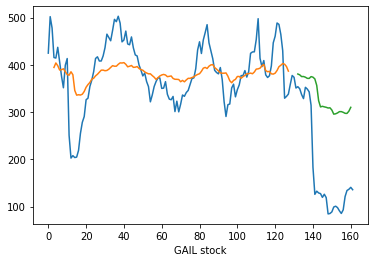

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.2627 - val_loss: 0.0050
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2530 - val_loss: 0.0040
Epoch 3/20
2/2 [==============================] - 0s 66ms/step - loss: 0.2432 - val_loss: 0.0031
Epoch 4/20
2/2 [==============================] - 0s 62ms/step - loss: 0.2329 - val_loss: 0.0024
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.2227 - val_loss: 0.0020
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.2117 - val_loss: 0.0018
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2003 - val_loss: 0.0020
Epoch 8/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1881 - val_loss: 0.0026
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1755 - val_loss: 0.0038
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1614 - val_loss: 0.0057
Epoch 11/20
2/2 [=============

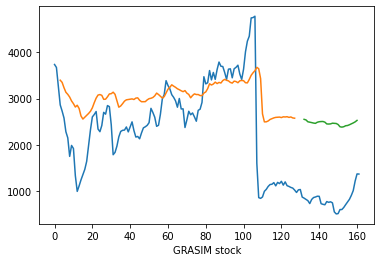

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.1526 - val_loss: 0.1738
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1469 - val_loss: 0.1664
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1412 - val_loss: 0.1588
Epoch 4/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1350 - val_loss: 0.1509
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1286 - val_loss: 0.1425
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1219 - val_loss: 0.1336
Epoch 7/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1150 - val_loss: 0.1242
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1077 - val_loss: 0.1141
Epoch 9/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0999 - val_loss: 0.1032
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0912 - val_loss: 0.0916
Epoch 11/20
2/2 [=============

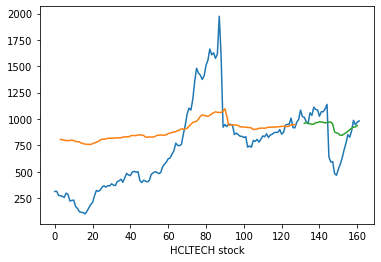

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1790 - val_loss: 0.3896
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1743 - val_loss: 0.3799
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1693 - val_loss: 0.3697
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1643 - val_loss: 0.3591
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1591 - val_loss: 0.3478
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1534 - val_loss: 0.3358
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1476 - val_loss: 0.3229
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1416 - val_loss: 0.3087
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1347 - val_loss: 0.2933
Epoch 10/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1278 - val_loss: 0.2762
Epoch 11/20
2/2 [=============

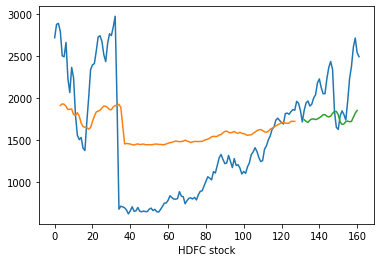

Epoch 1/20
2/2 [==============================] - 14s 3s/step - loss: 0.2262 - val_loss: 0.3784
Epoch 2/20
2/2 [==============================] - 0s 77ms/step - loss: 0.2183 - val_loss: 0.3664
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.2104 - val_loss: 0.3539
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2020 - val_loss: 0.3408
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1932 - val_loss: 0.3269
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1841 - val_loss: 0.3121
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1744 - val_loss: 0.2961
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1643 - val_loss: 0.2787
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1538 - val_loss: 0.2596
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1415 - val_loss: 0.2388
Epoch 11/20
2/2 [=============

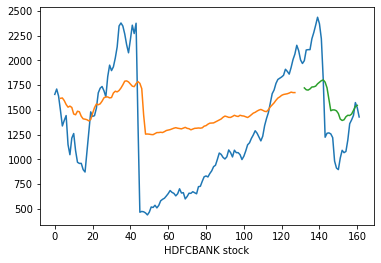

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.2904 - val_loss: 0.3958
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.2844 - val_loss: 0.3877
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2782 - val_loss: 0.3794
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2719 - val_loss: 0.3705
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2653 - val_loss: 0.3612
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.2581 - val_loss: 0.3513
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 0.2509 - val_loss: 0.3405
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2429 - val_loss: 0.3287
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.2339 - val_loss: 0.3158
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2244 - val_loss: 0.3014
Epoch 11/20
2/2 [=============

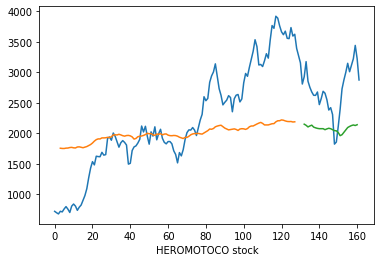

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.1324 - val_loss: 0.2591
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1281 - val_loss: 0.2522
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1235 - val_loss: 0.2451
Epoch 4/20
2/2 [==============================] - 0s 66ms/step - loss: 0.1189 - val_loss: 0.2377
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1142 - val_loss: 0.2300
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1093 - val_loss: 0.2219
Epoch 7/20
2/2 [==============================] - 0s 56ms/step - loss: 0.1043 - val_loss: 0.2132
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0988 - val_loss: 0.2040
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0931 - val_loss: 0.1940
Epoch 10/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0873 - val_loss: 0.1832
Epoch 11/20
2/2 [=============

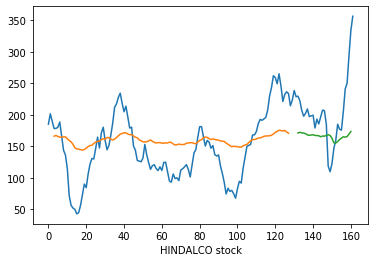

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.0552 - val_loss: 0.6640
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0514 - val_loss: 0.6443
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0477 - val_loss: 0.6241
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0440 - val_loss: 0.6030
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0406 - val_loss: 0.5808
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0370 - val_loss: 0.5576
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0340 - val_loss: 0.5328
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0309 - val_loss: 0.5065
Epoch 9/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0282 - val_loss: 0.4783
Epoch 10/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0260 - val_loss: 0.4482
Epoch 11/20
2/2 [=============

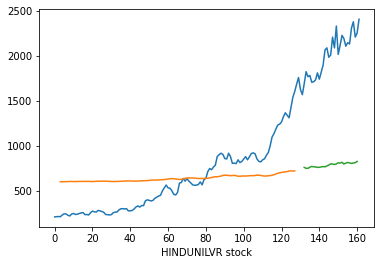

Epoch 1/20
2/2 [==============================] - 15s 3s/step - loss: 0.1836 - val_loss: 0.0238
Epoch 2/20
2/2 [==============================] - 0s 67ms/step - loss: 0.1770 - val_loss: 0.0210
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1701 - val_loss: 0.0184
Epoch 4/20
2/2 [==============================] - 0s 60ms/step - loss: 0.1632 - val_loss: 0.0157
Epoch 5/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1558 - val_loss: 0.0132
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1482 - val_loss: 0.0108
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1404 - val_loss: 0.0085
Epoch 8/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1317 - val_loss: 0.0065
Epoch 9/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1230 - val_loss: 0.0047
Epoch 10/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1137 - val_loss: 0.0034
Epoch 11/20
2/2 [=============

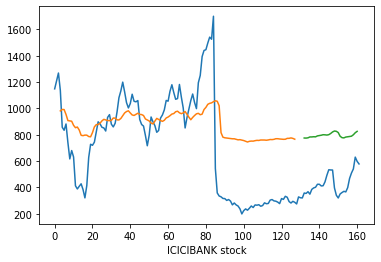

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.1585 - val_loss: 0.3548
Epoch 2/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1541 - val_loss: 0.3457
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1492 - val_loss: 0.3364
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1443 - val_loss: 0.3266
Epoch 5/20
2/2 [==============================] - 0s 60ms/step - loss: 0.1395 - val_loss: 0.3164
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1344 - val_loss: 0.3056
Epoch 7/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1294 - val_loss: 0.2939
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1238 - val_loss: 0.2813
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1181 - val_loss: 0.2676
Epoch 10/20
2/2 [==============================] - 0s 56ms/step - loss: 0.1119 - val_loss: 0.2524
Epoch 11/20
2/2 [=============

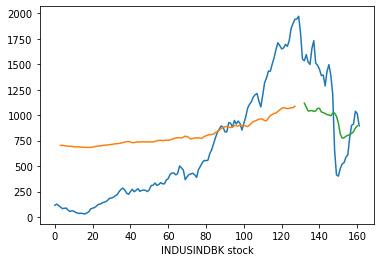

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.2253 - val_loss: 0.0059
Epoch 2/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2183 - val_loss: 0.0051
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2112 - val_loss: 0.0045
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2041 - val_loss: 0.0040
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1965 - val_loss: 0.0036
Epoch 6/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1886 - val_loss: 0.0035
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1809 - val_loss: 0.0036
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1727 - val_loss: 0.0040
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1639 - val_loss: 0.0048
Epoch 10/20
2/2 [==============================] - 0s 65ms/step - loss: 0.1545 - val_loss: 0.0060
Epoch 11/20
2/2 [=============

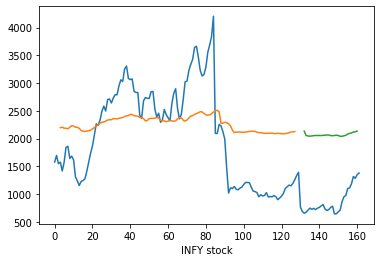

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.2610 - val_loss: 0.0060
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2522 - val_loss: 0.0050
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2430 - val_loss: 0.0041
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2335 - val_loss: 0.0033
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 0.2237 - val_loss: 0.0027
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2135 - val_loss: 0.0024
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2023 - val_loss: 0.0023
Epoch 8/20
2/2 [==============================] - 0s 65ms/step - loss: 0.1907 - val_loss: 0.0026
Epoch 9/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1780 - val_loss: 0.0033
Epoch 10/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1642 - val_loss: 0.0047
Epoch 11/20
2/2 [=============

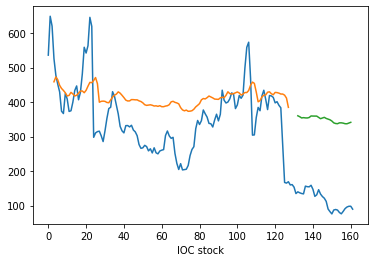

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.3040 - val_loss: 0.1435
Epoch 2/20
2/2 [==============================] - 0s 69ms/step - loss: 0.2939 - val_loss: 0.1368
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.2841 - val_loss: 0.1300
Epoch 4/20
2/2 [==============================] - 0s 51ms/step - loss: 0.2743 - val_loss: 0.1231
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 0.2636 - val_loss: 0.1160
Epoch 6/20
2/2 [==============================] - 0s 51ms/step - loss: 0.2526 - val_loss: 0.1085
Epoch 7/20
2/2 [==============================] - 0s 55ms/step - loss: 0.2407 - val_loss: 0.1008
Epoch 8/20
2/2 [==============================] - 0s 56ms/step - loss: 0.2284 - val_loss: 0.0927
Epoch 9/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2150 - val_loss: 0.0842
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.2003 - val_loss: 0.0752
Epoch 11/20
2/2 [=============

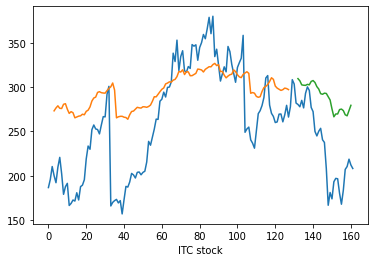

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.2197 - val_loss: 0.0053
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.2109 - val_loss: 0.0041
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.2017 - val_loss: 0.0031
Epoch 4/20
2/2 [==============================] - 0s 60ms/step - loss: 0.1925 - val_loss: 0.0023
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1827 - val_loss: 0.0018
Epoch 6/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1726 - val_loss: 0.0016
Epoch 7/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1622 - val_loss: 0.0019
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1511 - val_loss: 0.0028
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1388 - val_loss: 0.0044
Epoch 10/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1266 - val_loss: 0.0070
Epoch 11/20
2/2 [=============

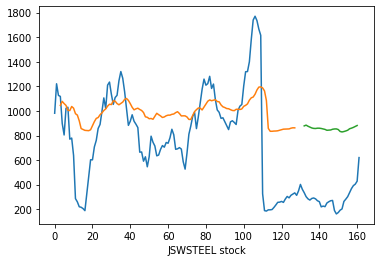

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1051 - val_loss: 0.5519
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1006 - val_loss: 0.5399
Epoch 3/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0961 - val_loss: 0.5274
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0916 - val_loss: 0.5140
Epoch 5/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0868 - val_loss: 0.4998
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0818 - val_loss: 0.4846
Epoch 7/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0769 - val_loss: 0.4679
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0715 - val_loss: 0.4497
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0658 - val_loss: 0.4294
Epoch 10/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0598 - val_loss: 0.4068
Epoch 11/20
2/2 [=============

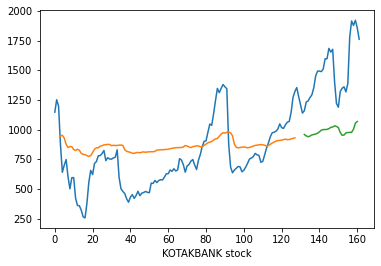

Epoch 1/20
2/2 [==============================] - 14s 3s/step - loss: 0.0790 - val_loss: 0.0320
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0747 - val_loss: 0.0291
Epoch 3/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0704 - val_loss: 0.0263
Epoch 4/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0661 - val_loss: 0.0235
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0619 - val_loss: 0.0207
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0573 - val_loss: 0.0180
Epoch 7/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0530 - val_loss: 0.0154
Epoch 8/20
2/2 [==============================] - 0s 69ms/step - loss: 0.0483 - val_loss: 0.0129
Epoch 9/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0437 - val_loss: 0.0104
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0391 - val_loss: 0.0082
Epoch 11/20
2/2 [=============

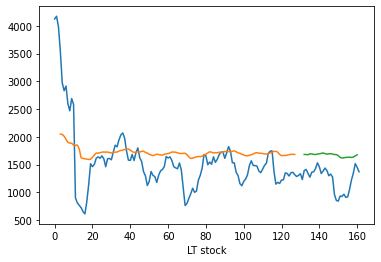

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.3723 - val_loss: 0.0883
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 0.3634 - val_loss: 0.0838
Epoch 3/20
2/2 [==============================] - 0s 52ms/step - loss: 0.3541 - val_loss: 0.0793
Epoch 4/20
2/2 [==============================] - 0s 64ms/step - loss: 0.3447 - val_loss: 0.0747
Epoch 5/20
2/2 [==============================] - 0s 51ms/step - loss: 0.3348 - val_loss: 0.0700
Epoch 6/20
2/2 [==============================] - 0s 60ms/step - loss: 0.3240 - val_loss: 0.0652
Epoch 7/20
2/2 [==============================] - 0s 59ms/step - loss: 0.3130 - val_loss: 0.0601
Epoch 8/20
2/2 [==============================] - 0s 78ms/step - loss: 0.3014 - val_loss: 0.0549
Epoch 9/20
2/2 [==============================] - 0s 81ms/step - loss: 0.2888 - val_loss: 0.0494
Epoch 10/20
2/2 [==============================] - 0s 64ms/step - loss: 0.2750 - val_loss: 0.0438
Epoch 11/20
2/2 [=============

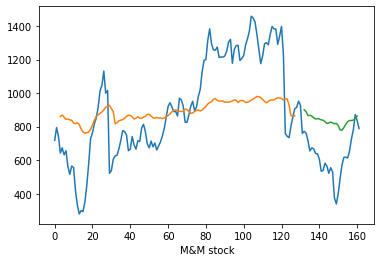

Epoch 1/20
2/2 [==============================] - 15s 4s/step - loss: 0.1423 - val_loss: 0.4823
Epoch 2/20
2/2 [==============================] - 0s 66ms/step - loss: 0.1382 - val_loss: 0.4703
Epoch 3/20
2/2 [==============================] - 0s 79ms/step - loss: 0.1337 - val_loss: 0.4579
Epoch 4/20
2/2 [==============================] - 0s 70ms/step - loss: 0.1295 - val_loss: 0.4446
Epoch 5/20
2/2 [==============================] - 0s 71ms/step - loss: 0.1247 - val_loss: 0.4304
Epoch 6/20
2/2 [==============================] - 0s 89ms/step - loss: 0.1201 - val_loss: 0.4150
Epoch 7/20
2/2 [==============================] - 0s 77ms/step - loss: 0.1150 - val_loss: 0.3981
Epoch 8/20
2/2 [==============================] - 0s 70ms/step - loss: 0.1096 - val_loss: 0.3795
Epoch 9/20
2/2 [==============================] - 0s 81ms/step - loss: 0.1040 - val_loss: 0.3587
Epoch 10/20
2/2 [==============================] - 0s 74ms/step - loss: 0.0978 - val_loss: 0.3353
Epoch 11/20
2/2 [=============

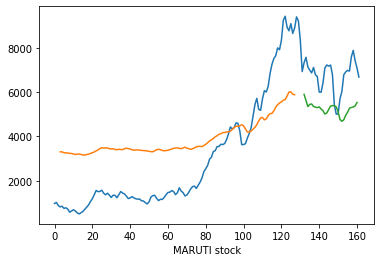

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.0346 - val_loss: 0.5965
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0332 - val_loss: 0.5888
Epoch 3/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0318 - val_loss: 0.5807
Epoch 4/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0304 - val_loss: 0.5724
Epoch 5/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0289 - val_loss: 0.5635
Epoch 6/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0274 - val_loss: 0.5542
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0260 - val_loss: 0.5442
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0245 - val_loss: 0.5334
Epoch 9/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0230 - val_loss: 0.5218
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0215 - val_loss: 0.5090
Epoch 11/20
2/2 [=============

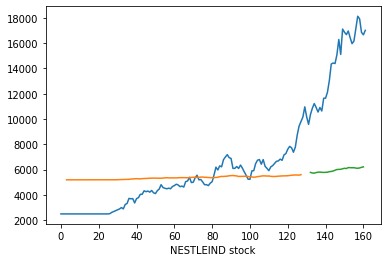

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.2835 - val_loss: 0.0469
Epoch 2/20
2/2 [==============================] - 0s 70ms/step - loss: 0.2701 - val_loss: 0.0425
Epoch 3/20
2/2 [==============================] - 0s 56ms/step - loss: 0.2566 - val_loss: 0.0382
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2428 - val_loss: 0.0339
Epoch 5/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2281 - val_loss: 0.0298
Epoch 6/20
2/2 [==============================] - 0s 55ms/step - loss: 0.2132 - val_loss: 0.0259
Epoch 7/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1969 - val_loss: 0.0222
Epoch 8/20
2/2 [==============================] - 0s 55ms/step - loss: 0.1793 - val_loss: 0.0189
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1612 - val_loss: 0.0163
Epoch 10/20
2/2 [==============================] - 0s 57ms/step - loss: 0.1409 - val_loss: 0.0146
Epoch 11/20
2/2 [=============

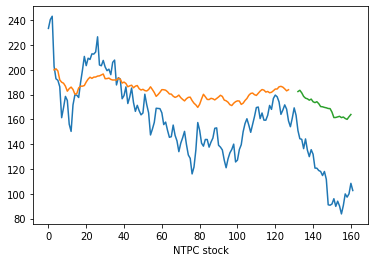

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.1823 - val_loss: 0.0015
Epoch 2/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1783 - val_loss: 0.0012
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1743 - val_loss: 9.3447e-04
Epoch 4/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1702 - val_loss: 7.4484e-04
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1662 - val_loss: 6.3865e-04
Epoch 6/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1619 - val_loss: 6.3199e-04
Epoch 7/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1573 - val_loss: 7.4500e-04
Epoch 8/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1527 - val_loss: 0.0010
Epoch 9/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1475 - val_loss: 0.0014
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1420 - val_loss: 0.0021
Epoch 11/2

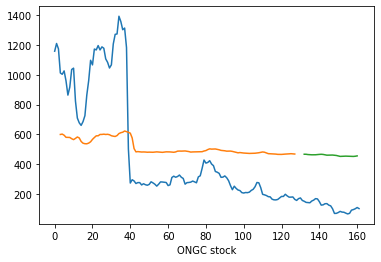

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.2020 - val_loss: 0.5960
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1947 - val_loss: 0.5799
Epoch 3/20
2/2 [==============================] - 0s 57ms/step - loss: 0.1872 - val_loss: 0.5630
Epoch 4/20
2/2 [==============================] - 0s 60ms/step - loss: 0.1801 - val_loss: 0.5450
Epoch 5/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1717 - val_loss: 0.5259
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1634 - val_loss: 0.5050
Epoch 7/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1544 - val_loss: 0.4822
Epoch 8/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1449 - val_loss: 0.4569
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1347 - val_loss: 0.4286
Epoch 10/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1245 - val_loss: 0.3967
Epoch 11/20
2/2 [=============

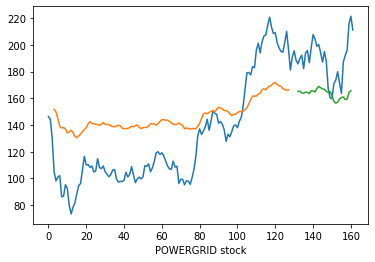

Epoch 1/20
2/2 [==============================] - 12s 3s/step - loss: 0.0791 - val_loss: 0.1809
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0766 - val_loss: 0.1756
Epoch 3/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0740 - val_loss: 0.1702
Epoch 4/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0713 - val_loss: 0.1646
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0688 - val_loss: 0.1588
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0660 - val_loss: 0.1527
Epoch 7/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0634 - val_loss: 0.1463
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0608 - val_loss: 0.1396
Epoch 9/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0577 - val_loss: 0.1326
Epoch 10/20
2/2 [==============================] - 0s 70ms/step - loss: 0.0550 - val_loss: 0.1251
Epoch 11/20
2/2 [=============

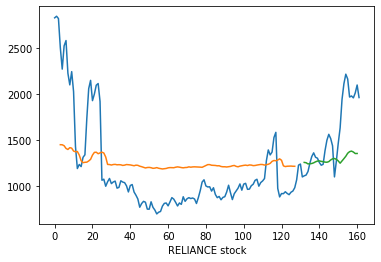

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.2626 - val_loss: 0.0014
Epoch 2/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2576 - val_loss: 0.0011
Epoch 3/20
2/2 [==============================] - 0s 55ms/step - loss: 0.2527 - val_loss: 7.9326e-04
Epoch 4/20
2/2 [==============================] - 0s 58ms/step - loss: 0.2473 - val_loss: 5.8074e-04
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 0.2421 - val_loss: 4.4573e-04
Epoch 6/20
2/2 [==============================] - 0s 55ms/step - loss: 0.2362 - val_loss: 4.0440e-04
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2303 - val_loss: 4.7750e-04
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 0.2237 - val_loss: 6.9373e-04
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.2169 - val_loss: 0.0011
Epoch 10/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2088 - val_loss: 0.0017
Epoch 

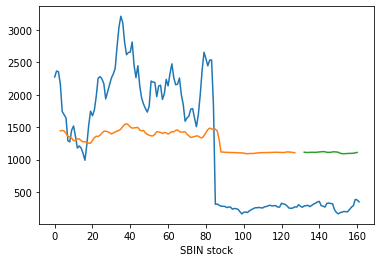

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.0905 - val_loss: 0.4824
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0876 - val_loss: 0.4730
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0849 - val_loss: 0.4634
Epoch 4/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0819 - val_loss: 0.4533
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0790 - val_loss: 0.4428
Epoch 6/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0760 - val_loss: 0.4317
Epoch 7/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0732 - val_loss: 0.4199
Epoch 8/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0699 - val_loss: 0.4073
Epoch 9/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0668 - val_loss: 0.3937
Epoch 10/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0635 - val_loss: 0.3789
Epoch 11/20
2/2 [=============

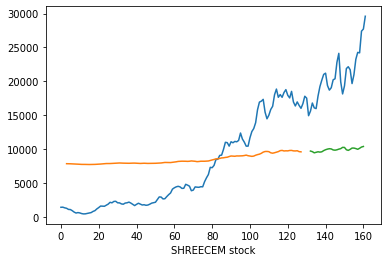

Epoch 1/20
2/2 [==============================] - 14s 4s/step - loss: 0.1382 - val_loss: 0.0043
Epoch 2/20
2/2 [==============================] - 0s 99ms/step - loss: 0.1342 - val_loss: 0.0037
Epoch 3/20
2/2 [==============================] - 0s 69ms/step - loss: 0.1304 - val_loss: 0.0031
Epoch 4/20
2/2 [==============================] - 0s 105ms/step - loss: 0.1265 - val_loss: 0.0025
Epoch 5/20
2/2 [==============================] - 0s 93ms/step - loss: 0.1222 - val_loss: 0.0021
Epoch 6/20
2/2 [==============================] - 0s 98ms/step - loss: 0.1176 - val_loss: 0.0017
Epoch 7/20
2/2 [==============================] - 0s 68ms/step - loss: 0.1130 - val_loss: 0.0015
Epoch 8/20
2/2 [==============================] - 0s 102ms/step - loss: 0.1082 - val_loss: 0.0014
Epoch 9/20
2/2 [==============================] - 0s 77ms/step - loss: 0.1027 - val_loss: 0.0015
Epoch 10/20
2/2 [==============================] - 0s 85ms/step - loss: 0.0969 - val_loss: 0.0020
Epoch 11/20
2/2 [===========

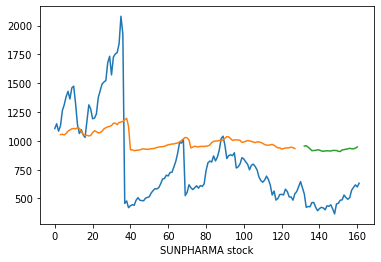

Epoch 1/20
2/2 [==============================] - 15s 3s/step - loss: 0.1538 - val_loss: 0.0063
Epoch 2/20
2/2 [==============================] - 0s 56ms/step - loss: 0.1491 - val_loss: 0.0055
Epoch 3/20
2/2 [==============================] - 0s 55ms/step - loss: 0.1445 - val_loss: 0.0047
Epoch 4/20
2/2 [==============================] - 0s 74ms/step - loss: 0.1398 - val_loss: 0.0040
Epoch 5/20
2/2 [==============================] - 0s 66ms/step - loss: 0.1347 - val_loss: 0.0033
Epoch 6/20
2/2 [==============================] - 0s 67ms/step - loss: 0.1296 - val_loss: 0.0028
Epoch 7/20
2/2 [==============================] - 0s 66ms/step - loss: 0.1242 - val_loss: 0.0024
Epoch 8/20
2/2 [==============================] - 0s 60ms/step - loss: 0.1181 - val_loss: 0.0021
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1121 - val_loss: 0.0021
Epoch 10/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1053 - val_loss: 0.0024
Epoch 11/20
2/2 [=============

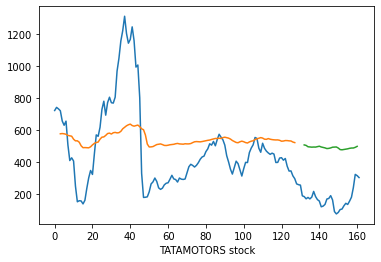

Epoch 1/20
2/2 [==============================] - 14s 3s/step - loss: 0.1833 - val_loss: 0.1664
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1774 - val_loss: 0.1604
Epoch 3/20
2/2 [==============================] - 0s 95ms/step - loss: 0.1715 - val_loss: 0.1544
Epoch 4/20
2/2 [==============================] - 0s 56ms/step - loss: 0.1655 - val_loss: 0.1481
Epoch 5/20
2/2 [==============================] - 0s 55ms/step - loss: 0.1593 - val_loss: 0.1417
Epoch 6/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1526 - val_loss: 0.1349
Epoch 7/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1458 - val_loss: 0.1279
Epoch 8/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1388 - val_loss: 0.1203
Epoch 9/20
2/2 [==============================] - 0s 70ms/step - loss: 0.1310 - val_loss: 0.1124
Epoch 10/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1228 - val_loss: 0.1038
Epoch 11/20
2/2 [=============

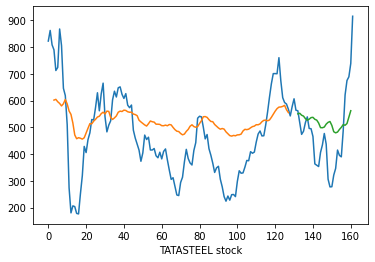

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.2404 - val_loss: 0.3756
Epoch 2/20
2/2 [==============================] - 0s 57ms/step - loss: 0.2315 - val_loss: 0.3614
Epoch 3/20
2/2 [==============================] - 0s 68ms/step - loss: 0.2218 - val_loss: 0.3468
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2123 - val_loss: 0.3314
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.2017 - val_loss: 0.3153
Epoch 6/20
2/2 [==============================] - 0s 60ms/step - loss: 0.1914 - val_loss: 0.2980
Epoch 7/20
2/2 [==============================] - 0s 56ms/step - loss: 0.1807 - val_loss: 0.2795
Epoch 8/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1684 - val_loss: 0.2596
Epoch 9/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1558 - val_loss: 0.2379
Epoch 10/20
2/2 [==============================] - 0s 63ms/step - loss: 0.1428 - val_loss: 0.2140
Epoch 11/20
2/2 [=============

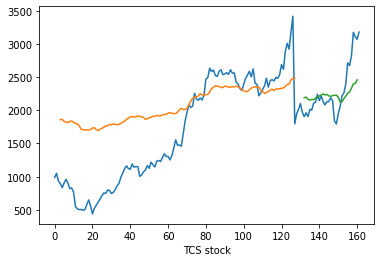

Epoch 1/20
2/2 [==============================] - 13s 3s/step - loss: 0.1048 - val_loss: 0.0380
Epoch 2/20
2/2 [==============================] - 0s 55ms/step - loss: 0.1011 - val_loss: 0.0352
Epoch 3/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0979 - val_loss: 0.0325
Epoch 4/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0944 - val_loss: 0.0298
Epoch 5/20
2/2 [==============================] - 0s 75ms/step - loss: 0.0907 - val_loss: 0.0270
Epoch 6/20
2/2 [==============================] - 0s 69ms/step - loss: 0.0871 - val_loss: 0.0242
Epoch 7/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0835 - val_loss: 0.0215
Epoch 8/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0796 - val_loss: 0.0187
Epoch 9/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0758 - val_loss: 0.0159
Epoch 10/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0717 - val_loss: 0.0132
Epoch 11/20
2/2 [=============

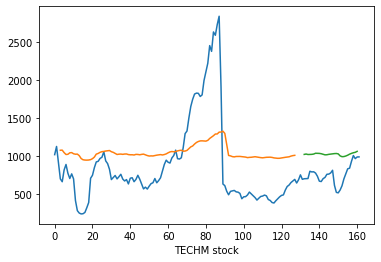

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.0902 - val_loss: 0.0611
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0870 - val_loss: 0.0567
Epoch 3/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0836 - val_loss: 0.0523
Epoch 4/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0807 - val_loss: 0.0479
Epoch 5/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0777 - val_loss: 0.0433
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0745 - val_loss: 0.0387
Epoch 7/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0713 - val_loss: 0.0340
Epoch 8/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0681 - val_loss: 0.0293
Epoch 9/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0648 - val_loss: 0.0245
Epoch 10/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0618 - val_loss: 0.0197
Epoch 11/20
2/2 [=============

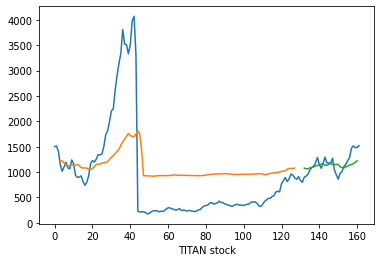

Epoch 1/20
2/2 [==============================] - 14s 3s/step - loss: 0.1099 - val_loss: 0.4016
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1058 - val_loss: 0.3914
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1015 - val_loss: 0.3808
Epoch 4/20
2/2 [==============================] - 0s 70ms/step - loss: 0.0971 - val_loss: 0.3698
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0928 - val_loss: 0.3580
Epoch 6/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0881 - val_loss: 0.3456
Epoch 7/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0835 - val_loss: 0.3321
Epoch 8/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0783 - val_loss: 0.3176
Epoch 9/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0733 - val_loss: 0.3017
Epoch 10/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0680 - val_loss: 0.2842
Epoch 11/20
2/2 [=============

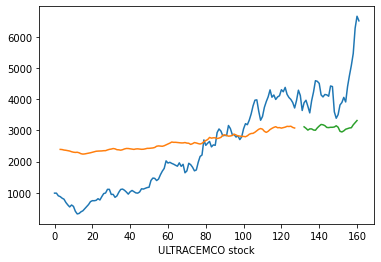

Epoch 1/20
2/2 [==============================] - 12s 3s/step - loss: 0.0921 - val_loss: 0.0576
Epoch 2/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0874 - val_loss: 0.0530
Epoch 3/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0824 - val_loss: 0.0484
Epoch 4/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0775 - val_loss: 0.0436
Epoch 5/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0724 - val_loss: 0.0388
Epoch 6/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0670 - val_loss: 0.0338
Epoch 7/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0615 - val_loss: 0.0288
Epoch 8/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0559 - val_loss: 0.0237
Epoch 9/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0501 - val_loss: 0.0186
Epoch 10/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0445 - val_loss: 0.0136
Epoch 11/20
2/2 [=============

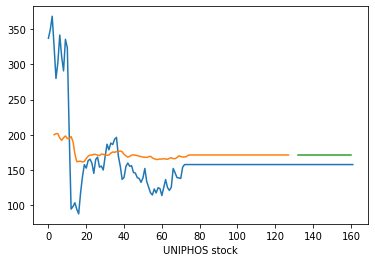

Epoch 1/20
2/2 [==============================] - 14s 3s/step - loss: 0.1187 - val_loss: 0.3321
Epoch 2/20
2/2 [==============================] - 0s 62ms/step - loss: 0.1147 - val_loss: 0.3214
Epoch 3/20
2/2 [==============================] - 0s 68ms/step - loss: 0.1109 - val_loss: 0.3103
Epoch 4/20
2/2 [==============================] - 0s 61ms/step - loss: 0.1074 - val_loss: 0.2987
Epoch 5/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1034 - val_loss: 0.2866
Epoch 6/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0995 - val_loss: 0.2737
Epoch 7/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0955 - val_loss: 0.2601
Epoch 8/20
2/2 [==============================] - 0s 81ms/step - loss: 0.0915 - val_loss: 0.2455
Epoch 9/20
2/2 [==============================] - 0s 77ms/step - loss: 0.0874 - val_loss: 0.2299
Epoch 10/20
2/2 [==============================] - 0s 98ms/step - loss: 0.0835 - val_loss: 0.2130
Epoch 11/20
2/2 [=============

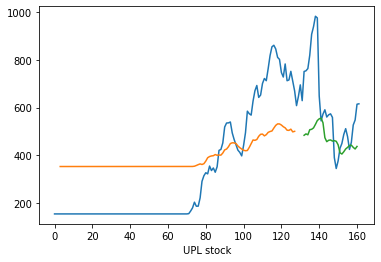

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.0347 - val_loss: 1.9889e-04
Epoch 2/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0334 - val_loss: 8.8086e-05
Epoch 3/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0323 - val_loss: 1.3002e-04
Epoch 4/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0313 - val_loss: 3.4141e-04
Epoch 5/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0305 - val_loss: 7.4021e-04
Epoch 6/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0298 - val_loss: 0.0013
Epoch 7/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0290 - val_loss: 0.0020
Epoch 8/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0288 - val_loss: 0.0029
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0286 - val_loss: 0.0038
Epoch 10/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0285 - val_loss: 0.0047
Epoch 11/2

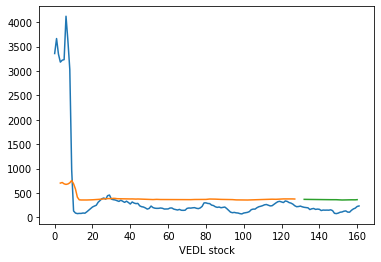

Epoch 1/20
2/2 [==============================] - 17s 3s/step - loss: 0.3059 - val_loss: 0.0537
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2975 - val_loss: 0.0507
Epoch 3/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2893 - val_loss: 0.0476
Epoch 4/20
2/2 [==============================] - 0s 58ms/step - loss: 0.2807 - val_loss: 0.0446
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 0.2717 - val_loss: 0.0415
Epoch 6/20
2/2 [==============================] - 0s 51ms/step - loss: 0.2623 - val_loss: 0.0383
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2522 - val_loss: 0.0351
Epoch 8/20
2/2 [==============================] - 0s 58ms/step - loss: 0.2415 - val_loss: 0.0319
Epoch 9/20
2/2 [==============================] - 0s 75ms/step - loss: 0.2299 - val_loss: 0.0287
Epoch 10/20
2/2 [==============================] - 0s 55ms/step - loss: 0.2168 - val_loss: 0.0255
Epoch 11/20
2/2 [=============

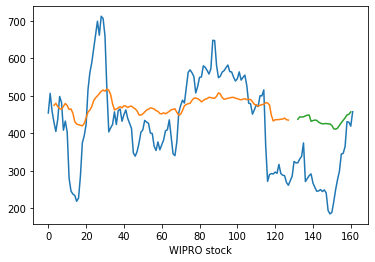

Epoch 1/20
2/2 [==============================] - 15s 3s/step - loss: 0.2383 - val_loss: 0.1714
Epoch 2/20
2/2 [==============================] - 0s 66ms/step - loss: 0.2301 - val_loss: 0.1637
Epoch 3/20
2/2 [==============================] - 0s 59ms/step - loss: 0.2218 - val_loss: 0.1557
Epoch 4/20
2/2 [==============================] - 0s 51ms/step - loss: 0.2126 - val_loss: 0.1475
Epoch 5/20
2/2 [==============================] - 0s 74ms/step - loss: 0.2041 - val_loss: 0.1390
Epoch 6/20
2/2 [==============================] - 0s 57ms/step - loss: 0.1944 - val_loss: 0.1300
Epoch 7/20
2/2 [==============================] - 0s 75ms/step - loss: 0.1841 - val_loss: 0.1205
Epoch 8/20
2/2 [==============================] - 0s 62ms/step - loss: 0.1732 - val_loss: 0.1106
Epoch 9/20
2/2 [==============================] - 0s 64ms/step - loss: 0.1623 - val_loss: 0.1000
Epoch 10/20
2/2 [==============================] - 0s 56ms/step - loss: 0.1498 - val_loss: 0.0888
Epoch 11/20
2/2 [=============

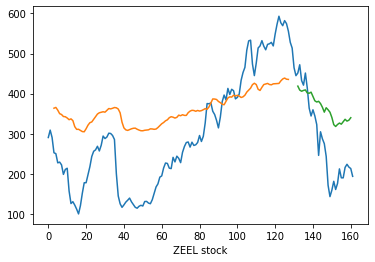

In [ ]:
for i in stocks_dfm.columns:
    scaler=MinMaxScaler(feature_range=(0,1))
    df1=scaler.fit_transform(np.array(stocks_dfm[i]).reshape(-1,1))


    train_data,test_data=df1[0:129],df1[129:len(stocks_dfm)]
    
    time_step = 3
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)

    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(3,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(25,return_sequences=True))
    model.add(LSTM(15,return_sequences=True))

    model.add(LSTM(5))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')   
    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)
   
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)

    train_predict=scaler.inverse_transform(train_predict)
    test_predict=scaler.inverse_transform(test_predict)

    mae = metrics.mean_absolute_error(ytest,test_predict)
    mse = metrics.mean_squared_error(ytest,test_predict)
    rmse = np.sqrt(mse) #mse**(0.5)  

    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("RMSE:", rmse)


    look_back=3
    trainPredictPlot = numpy.empty_like(df1)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
 
    testPredictPlot = numpy.empty_like(df1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

    plt.plot(scaler.inverse_transform(df1))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.xlabel(i+' stock')
    plt.show()

By observing plots of actual vs prediction,we can tell that RNN model peforms better than the rest for most of the stocks.